# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо провести исследовательский анализ данных. Наша задача - установить важные параметры, влияющие на стоимость объекта недвижимости. В дальнейшем это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучим общую информацию датасета. 

**Импортируем библиотеку Pandas, откроем и сохранием датафрейм в переменную `data`. Посмотрим общую информацию содержимого.**

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# серверный путь
pth1 = '/datasets/'
# локальный путь
pth2 = 'D:/dev/data_science/datasets/'

# откроем и сохраним датафрейм в переменную `data`
try:
    if os.path.exists(pth1):
        data = pd.read_csv(pth1+'real_estate_data.csv', sep='\t')
    elif os.path.exists(pth2):
        data = pd.read_csv(pth2+'real_estate_data.csv', sep='\t')
except FileNotFoundError:
    print('Path does not exist. Check path')
    
# выведем общую информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 21 столбец и 23699 вхождений. Некоторые объекты содержат пропущенные значения. В нескольких столбцах следует изменить тип данных, например, `floors_total` - количество этажей в здании имеет тип float, корректно будет использовать тип данных int.

**Отобразим первые 15 строк таблицы `data`.**

In [3]:
# с помощью метода head() выведем 15 первых строк таблицы
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Среди записей имеются объекты, у которых пропущены некоторые значения.

**Построим гистограмму для каждого числового столбца в таблице `data`.**

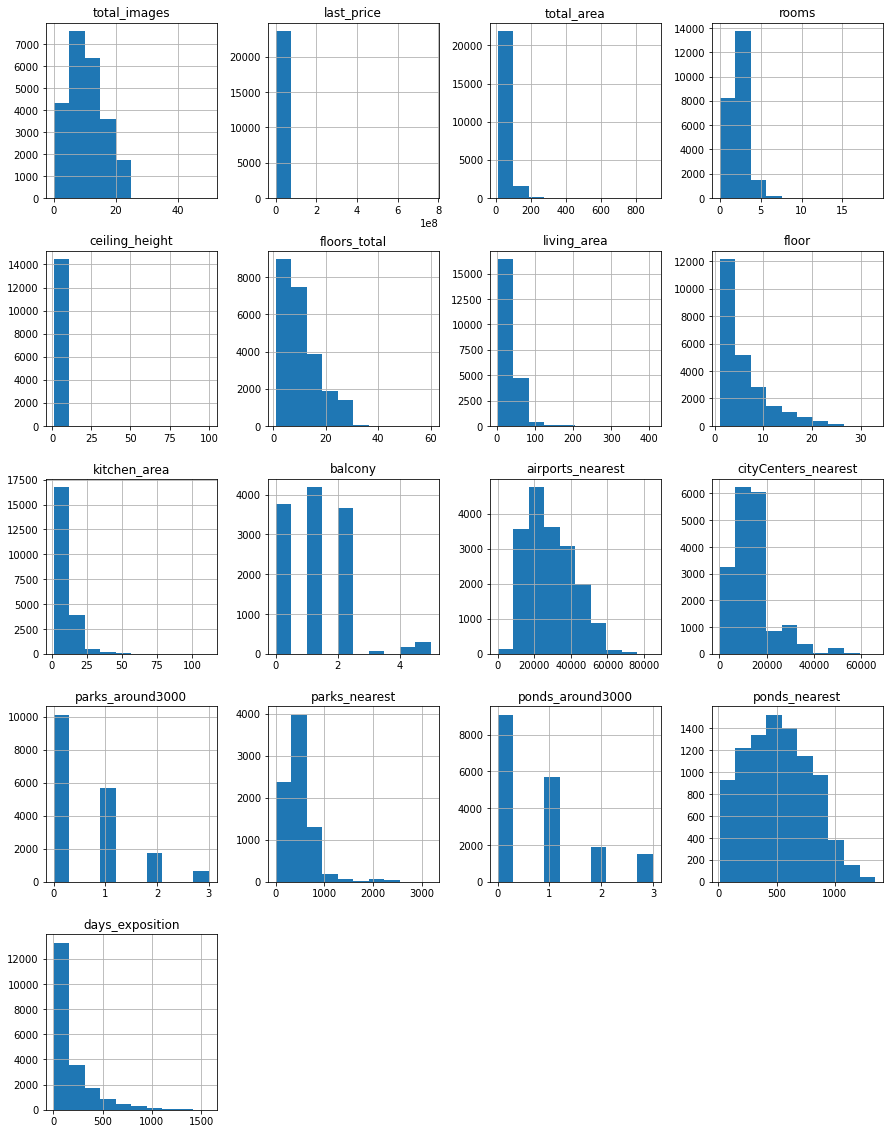

In [4]:
# с помощью метода hist() построим гистограмму размером 15 на 20
data.hist(figsize=(15, 20));

На экране 17 гистограмм количественных признаков таблицы `data`. На некоторых четко видно присутствие выбросов (нетипичных значений), к примеру, в столбцах `last_price` и `total_area`.

## Предобработка данных

**Найдем и изучим пропуски в данных**

Выведем количество пропущенных значений для каждого столбца.

In [5]:
# найдем пропуски в каждом столбце и подсчитаем их количество
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Значения выше - это количество пропусков в каждом из столбцов.

**Заполняем пропуски**

**Избавляемся от пропусков в столбцах `ceiling_height`, `living_area`, `kitchen_area`.**

Для того, чтобы избавиться от пропусков в столбце `ceiling_height`, разобъем столбец `total_area` на 4 интервала (квартили) с помощью метода Pandas `qcut` и сохраним в новом столбце `total_area_type`. Таким образом каждая квартира будет относиться к одной из 4-х категорий: `small`, `pre-medium`, `medium`, `big`.

После чего заполним пропуски медианным значением высоты потолка в зависимости от принадлежности к той или иной категории столбца `total_area_type`.

Можно было применить ко всем пропущенным значениям столбца `ceiling_height` общее медианное значение (медиана для всех значений), но разбивка на категории даст более точные результаты, поскольку высота от пола до потолка является чаще всего типичным значением в зависимости от общей площади квартиры. К примеру, в маленьких квартирах потолок может быть несколько ниже, чем в квартирах с бОльшей площадью.

Пропуски в столбцах `living_area` и `kitchen_area` устраним по тому же принципу, что и в `ceiling_height`

In [6]:
# проверка размерности перед вычислениями
data.shape

(23699, 22)

In [7]:
# разбиваем `total_area` на квартили и сохраняем эти значения в новом столбце `total_area_type`
data['total_area_type'] = pd.qcut(data['total_area'], 4, labels=['small', 'pre-medium', 'medium', 'big'])
# проверка размерности после вычислений
data.shape

(23699, 23)

Все объекты на месте.

Посмотрим на результат:

In [8]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_type
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,big
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,pre-medium
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,medium
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,big
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,big


Для того, чтобы сохранить принцип чистого кода, определим функцию `fill_na_to_median`, которая будет принимать в качестве параметра название столбца с пропусками. В теле функции описан цикл `for`, который перебирает уникальные значения таблицы `total_area_type`, после чего заполняет пропуски в заданном столбце медианным значением, ссылаясь на категорию квартиры.

In [9]:
# определим функцию `fill_na_to_median`, принимающую в качестве параметра название столбца `column`
def fill_na_to_median(column):
# с помощью цикла `for` пройдемся по уникальным значениям `total_area_type`
    for type in data['total_area_type'].unique():
# заполним пропущенные значения в столбце медианным значением квартир,
# которые относятся к той же категории квартир, что и квартира с пропущеным значением  
        data.loc[data['total_area_type'] == type, column] = \
        data.loc[data['total_area_type'] == type, column].fillna(
            data.loc[data['total_area_type'] == type, column].median()
        )

Функция реализована, применим её для заполнения пропусков в 3-х столбцах (`ceileng_height`, `kitchen_area`, `living_area`):

In [10]:
# проверка размерности перед вычислениями
data.shape

(23699, 23)

In [11]:
# соберем названия столбцов в список `columns`
columns = ['ceiling_height', 'kitchen_area', 'living_area']
# и поочереди передадим наименования столбцов в функцию `fill_na_to_median`
for column in columns:
    fill_na_to_median(column)
    
# проверка размерности после вычислений
data.shape

(23699, 23)

In [12]:
# смотрим количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
total_area_type             0
dtype: int64

В 3-х столбцах пропуски успешно заполнены.

**Избавимся от пропусков в столбце `balcony`**

Все пропуски заполним 0, поскольку примем за истину тот факт, что пользователь решил не указывать количество балконов по причине их отсутствия

In [13]:
# заменим пропущенные значения на 0
data['balcony'] = data['balcony'].fillna(0)
# проверка размерности после вычислений
data.shape

(23699, 23)

In [14]:
# смотрим на пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
total_area_type             0
dtype: int64

**Рассмотрим картографические столбцы `parks_around3000`, `ponds_around3000`, `parks_nearest` и `ponds_nearest`**

Из суммарного вывода пропущенных значений интересно выглядит одинаковое количество пропусков в столбцах `parks_around3000`и `ponds_around3000` (по 5518). Изучим записи, в которых есть пропуск в `parks_around3000` и одновременно в `ponds_around3000`

In [15]:
# Применим логическую индексацию: найдем все строки таблицы,
# у которых есть пропуск в parks_around3000 и одновременно в ponds_around3000
# Подсчитаем суммарное количество пропусков в каждом столбце
data.loc[data['parks_around3000'].isna() & data['ponds_around3000'].isna()].isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              10
living_area                0
floor                      0
is_apartment            4890
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              8
airports_nearest        5518
cityCenters_nearest     5518
parks_around3000        5518
parks_nearest           5518
ponds_around3000        5518
ponds_nearest           5518
days_exposition          865
total_area_type            0
dtype: int64

Имеется 5518 объявлений, в которых картографические данные напрочь отсутствуют. Что еще у них общего?

In [16]:
# Выведем на экран первые 15 строк после логической индексации
data[data['parks_around3000'].isna() & data['ponds_around3000'].isna()].head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_type
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,NaN,...,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,small
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.43,26,NaN,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,small
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,NaN,...,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,medium
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,medium
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.60,9.0,17.20,2,NaN,...,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,small
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,27.40,1,NaN,...,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,pre-medium
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.30,9,NaN,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0,small
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,2.60,4.0,42.50,3,NaN,...,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0,medium
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,2.60,12.0,17.20,8,NaN,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0,small
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9.0,48.80,5,NaN,...,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0,big


На первый взгляд ничего общего у этих записей нет. Предположим, что 5518 объявлений столкнулись с неисправностью геосервисов, ответственных за получение картографических данных. В таком случае, условимся их не трогать.

Рассмотрим данные, у которых нет пропусков в столбце `parks_around3000`.

In [17]:
# суммируем пропуски в столбцах, у которых `parks_around3000` не имеет пропущенных значений
data[data['parks_around3000'].notna()].isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               76
living_area                 0
floor                       0
is_apartment            16034
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              41
airports_nearest           24
cityCenters_nearest         1
parks_around3000            0
parks_nearest           10102
ponds_around3000            0
ponds_nearest            9071
days_exposition          2316
total_area_type             0
dtype: int64

In [18]:
# Применим к этой сортировке к столбцу `parks_around3000` 
# метод `value_counts()` для подсчета повторяющихся значений
data.loc[data['parks_around3000'].notna(), 'parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

В столбце `parks_around3000` имеется 10106 записей со значением 0. Т.е. у 10106 клиентов в радиусе 3 км. нет ни одного парка. Это число очень похоже на 10102 пропущенных значения в столбце `parks_nearest`.

Таким образом напрашивается некая логика - если у пользователя нет парка в радиусе 3 км., то геосервис не станет указывать ближайший парк, который находится на расстоянии 5-10 км.

Чтобы удостовериться в этом - выведем на экран максимальное значение столбца `parks_nearest`:

In [19]:
data['parks_nearest'].max()

3190.0

Самое большое расстояние до ближайшего парка = 3190 метров (чуть более 3км). Таким образом, мы правы как минимум в том, что геосервисы не считают парки ближайшими, если они находятся на расстоянии более 3190 метров.

Заполнять пропуски 0 не будем, поскольку это окажется заглушкой, но никак не логичным заполнением пропуска.

Теперь взглянем на записи `ponds_around3000`, у которых нет пропусков

In [20]:
# Суммируем пропуски в столбцах, у которых `ponds_around3000` не имеет пропущенных значений
data.loc[data['ponds_around3000'].notna()].isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               76
living_area                 0
floor                       0
is_apartment            16034
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              41
airports_nearest           24
cityCenters_nearest         1
parks_around3000            0
parks_nearest           10102
ponds_around3000            0
ponds_nearest            9071
days_exposition          2316
total_area_type             0
dtype: int64

In [21]:
# Применим к этой сортировке к столбцу `ponds_around3000` метод `value_counts()` для подсчета уникальных значений. 
data.loc[data['ponds_around3000'].notna(), 'ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

Видим, что количество пропущенных значений в `ponds_nearest` совпадает с числом записей, в которых значение количества прудов в радиусе 3 км. равняется 0.

По аналогии с `parks_nearest` посмотрим на максимальное значение столбца `ponds_nearest`:

In [22]:
data['ponds_nearest'].max()

1344.0

В данном случае ситуация несколько другая, поскольку максимально отдаленный ближайший пруд находится на расстоянии 1344 метров. В целом, логика с парками работает и с прудами. Оставим эти данные как есть.

### Промежуточный вывод о заполнении пропусков

**Столбцы с пользовательской информацией, у которых имеются пропуски**:
- `ceiling_height` (высота от пола до потолка);
- `floors_total` (общее количество этажей);
- `living_area` (жилая площадь);
- `is_apartment` (является ли квартира апартаментами (булев тип));
- `kitchen_area` (площадь кухни);
- `balcony` (количество балконов).

**Наиболее вероятная причина пропущенных значений в этих столбцах - это нежелание пользователя указывать эти параметры. Невнимательность пользователя тоже не стоит исключать, ровно как и системную ошибку при записи данных (публикации объявления).**

Разбили показатель общей площади квартиры `total_area` на квартили и заполнили пропуски в количественных пользовательских данных на медианное значение столбцов, в зависимости от принадлежности к тому или иному квартилю.

С помощью разбиения на квартили удалось устранить пропуски в столбцах `ceiling_height`, `living_area`, `kitchen_area`.

В столбце `balcony` заменили пропущенные значения на 0.

**Картографические данные**:
- `locality_name` (наименование населенного пункта);
- `airports_nearest` (расстояние до ближайшего аэропорта);
- `cityCenters_nearest` (расстояние до центра города);
- `parks_around3000` (количество парков в радиусе 3000м.);
- `parks_nearest` (расстояние до ближайшего парка (м));
- `ponds_around3000` (количество прудов в радиусе 3000м.);
- `ponds_nearest` (расстояние до ближайшего пруда (м));
- `days_exposition` (сколько дней объявление было актуальным).

При изучении данных была замечена особенность в парах столбцов [`parks_around3000`: `parks_nearest`] и [`ponds_around3000`: `ponds_nearest`]. Там, где количество парков (прудов) в радиусе 3 км. равнялось 0, оказывался пропуск в столбце `parks_nearest` (`ponds_nearest`). Благодаря чему, выдвинули предположение об особенностях геосервисов, которые предоставляют картографические данные. 

**Причиной возникновения пропусков в картографических данных скорее всего является некая логика сервиса, либо сбой программного обеспечения при публикации объявление. Но и человеческий фактор мог сыграть свою роль.**

**Для оставшихся пропущенных значений логичной замены не наблюдаем.**

### Изменим тип данных в столбцах, где это необходимо

In [23]:
data.info() # Используя метод info рассмотрим типы данных в столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_images          23699 non-null  int64   
 1   last_price            23699 non-null  float64 
 2   total_area            23699 non-null  float64 
 3   first_day_exposition  23699 non-null  object  
 4   rooms                 23699 non-null  int64   
 5   ceiling_height        23699 non-null  float64 
 6   floors_total          23613 non-null  float64 
 7   living_area           23699 non-null  float64 
 8   floor                 23699 non-null  int64   
 9   is_apartment          2775 non-null   object  
 10  studio                23699 non-null  bool    
 11  open_plan             23699 non-null  bool    
 12  kitchen_area          23699 non-null  float64 
 13  balcony               23699 non-null  float64 
 14  locality_name         23650 non-null  object  
 15  ai

В столбцах `first_day_exposition`, `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition`, `is_apartment` имеется необходимость в изменении типа данных. 

`first_day_exposition` - столбец с датой. Приведем к типу `datetime`

`floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` - столбцы с целочисленными данными (`int`). Почему: не может быть 1.5 балкона в квартире, либо же не может 4.2 пруда находиться в радиусе 3 км.

`is_apartament` - столбец с логическими данными (тип `bool`). Почему: квартира либо является апартаментами (`True`), либо не является (`False`)

Однако, в столбцах `floors_total`, `parks_around3000`, `ponds_around3000`, `days_exposition` мы не убирали (убрали неполностью) пропуски, от чего поменять тип данных не получится. Поскольку значение `NaN` является объектом типа `float`, но никак не объектом типа `int`.

In [24]:
# С помощью метода `astype()` меняем тип данных `balcony` на `int`, а столбец `is_apartment` на тип `bool`
data = data.astype({'balcony': 'int', 'is_apartment': 'bool'})

# Отдельно изменим тип данных столбца `first_day_exposition` (из-за особенностей изменения типа данных дат)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 
# Меняем тип данных с `object` на `datetime`

Для проверки того, что типы данных изменились, вызовем метод `info()` еще раз.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Теперь `is_apartment`, `balcony` и `first_day_exposition` имеют верные типы данных.

**Промежуточный вывод**

Определили столбцы с некорректными типами данных. Но не в каждом из них можем изменить тип данных, поскольку в столбцах с количественными данными, имеющими пропущенные значения и тип данных `float`, нельзя изменить тип данных с помощью метода `astype()`, так как значение `NaN` есть объект типа `float` и не может быть объектом типа `int`.

Но без успеха тоже не обошлось. Для столбцов `is_apartment`, `balcony` и `first_day_exposition` удалось изменить тип данных на корректный.

### Разберемся с неявными дубликатами в столбце `locality_name`

Установим количество уникальных значений в столбце `locality_name`

In [26]:
# Применим к столбцу `locality_name` метод unique() для поиска уникальных значений. И метод len() для подсчета количества этих значений
len(data['locality_name'].unique())

365

А также выведем полученный список на экран

In [27]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В некоторых названиях населенных пунктов чередуются буквы 'ё' и 'е'. Вот и наши неявные дубликаты.

Избавимся от них заменой буквы 'ё' (там, где она есть) на букву 'е' с помощью небыстрого, но действенного цикла, который пройдется по каждой строке таблицы, с целью поиска буквы 'ё'.

In [28]:
# Объявим переменную `errors` для подсчета ошибок в цикле
errors = 0
# С помощью цикла `for` пробежимся по каждой строке таблицы `data`
for i in range(len(data)):
    try:
        # Там, где в населенном пунтке есть буква 'ё', заменим ее на букву 'е'
        data.loc[i, 'locality_name'] = data.loc[i, 'locality_name'].replace('ё', 'е')
    except:
        errors += 1
# Посмотрим сколько раз инструкция в теле цикла привела к ошибке
errors

49

49 ошибок - это 49 пропущенных значений. Ошибки возникают из-за того, что пропуск имеет тип данных `float` и как нам известно, у `float` нет метода `replace()`.

Подсчитаем еще раз количество уникальных значений в столбце `locality_name`

In [29]:
len(data['locality_name'].unique())

331

**Промежуточный вывод**

Определили уникальные значения столбца `locality_name` (наименование населенного пункта). Установили, что неявные дубликаты содержат букву 'ё' вместо буквы 'е' (или же наоборот). С помощью цикла и логической индексации удалось заменить 'ё' на 'е'.

34 неявных дубликата были удалены. Успех!

### Обработаем аномалии

**Столбец `last_price`**

Для обнаружения аномалий построим "ящик с усами":

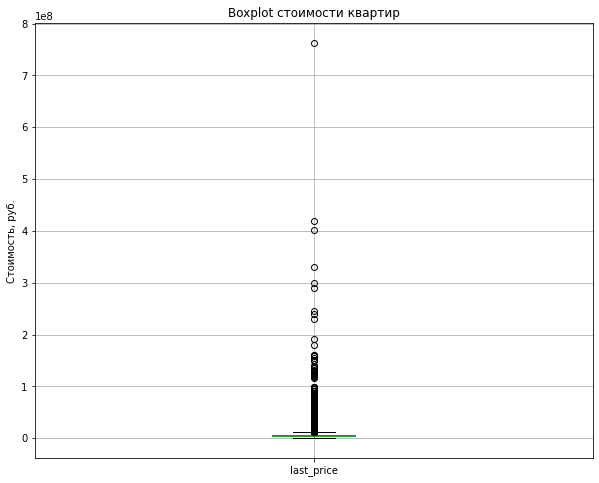

In [30]:
data.boxplot('last_price', figsize=(10, 8))
plt.ylabel('Стоимость, руб.')
plt.title('Boxplot стоимости квартир');

И гистограмму:

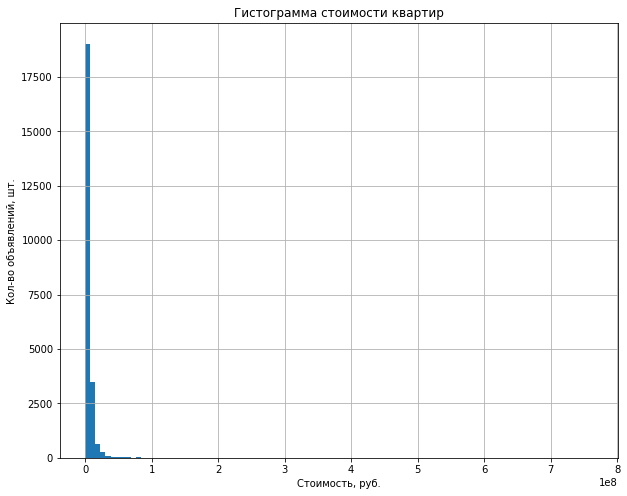

In [31]:
data['last_price'].hist(figsize=(10, 8), bins=100)
plt.xlabel('Стоимость, руб.')
plt.ylabel('Кол-во объявлений, шт.')
plt.title('Гистограмма стоимости квартир');

На гистограмме видим, что одно значение устремилось слишком далеко от всех остальных, из-за чего все остальные объекты "вжались" в левую часть гистограммы. Огромная стоимость квартиры необязательно ошибка, однако, хочется посмотреть на распределение более детально (без очень больших значений):

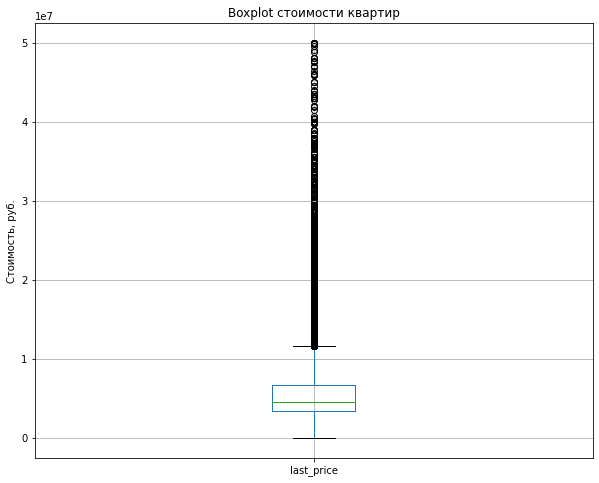

In [32]:
# ограничим набор данных квартирами стоимостью < 50 млн.руб.
data.loc[data['last_price'] < 50*10**6].boxplot('last_price', figsize=(10, 8))
plt.ylabel('Стоимость, руб.')
plt.title('Boxplot стоимости квартир');

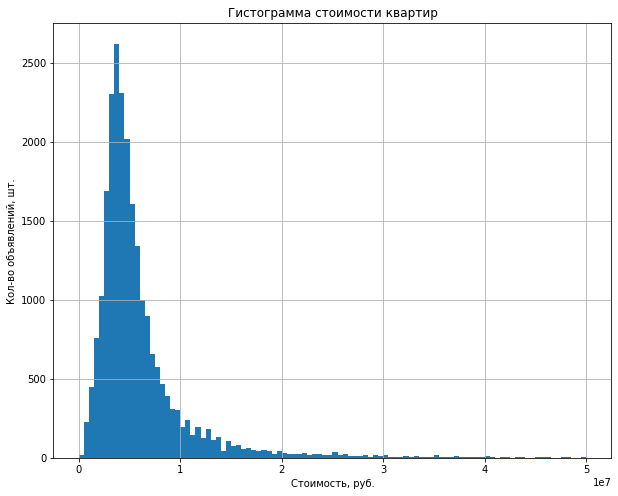

In [33]:
# ограничим набор данных квартирами стоимостью < 50 млн.руб.
x = data.loc[data['last_price'] < 50*10**6, 'last_price']
x.hist(figsize=(10, 8), bins=100)
plt.xlabel('Стоимость, руб.')
plt.ylabel('Кол-во объявлений, шт.')
plt.title('Гистограмма стоимости квартир');

Теперь гистограмма более детально показывает наше распределение. Видим, что имеются квартиры и по 40, 50 млн., но важнее то, что есть значения, расположенные слишком близко к 0. Всё же мы рассматриваем квартиры и их минимальная стоимость должна иметь некий порог. Условимся на 400т.р.

In [34]:
# С помощью логической индексации найдем строки, в которых значение столбца `last_price` меньше 400000
data.loc[data['last_price'] < 400000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_type
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,True,...,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,big


В данных обнаружилась одна строка, где в столбце `last_price` указано значение 12190. Можно предположить, что пользователь указал цену в тыс.руб. Тогда по этой логике 12190 тыс.руб. равняется 12190000. Изменим это значение на верное

In [35]:
# Заменим значение 12190 на 12190000
data.loc[data['last_price'] < 400000, 'last_price'] *= 1000
# найдем эту запись по id
data.iloc[8793]

total_images                              7
last_price                       12190000.0
total_area                            109.0
first_day_exposition    2019-03-20 00:00:00
rooms                                     2
ceiling_height                         2.75
floors_total                           25.0
living_area                            32.0
floor                                    25
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                           40.5
balcony                                   0
locality_name               Санкт-Петербург
airports_nearest                    36421.0
cityCenters_nearest                  9176.0
parks_around3000                        1.0
parks_nearest                         805.0
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                         8.0
total_area_type                 

Привели запись в корректный вид.

Строить заново гитсограмму не станем, поскольку мы обработали всего 1 значение и распределение от этого сильно не изменится.

**Столбец `ceiling_height`**

Для начала посмотрим какие высоты фигурируют в нашей таблице:

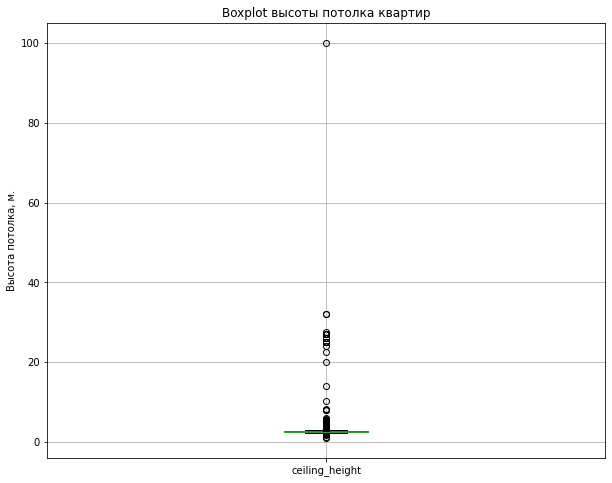

In [36]:
data.boxplot('ceiling_height', figsize=(10, 8))
plt.ylabel('Высота потолка, м.')
plt.title('Boxplot высоты потолка квартир');

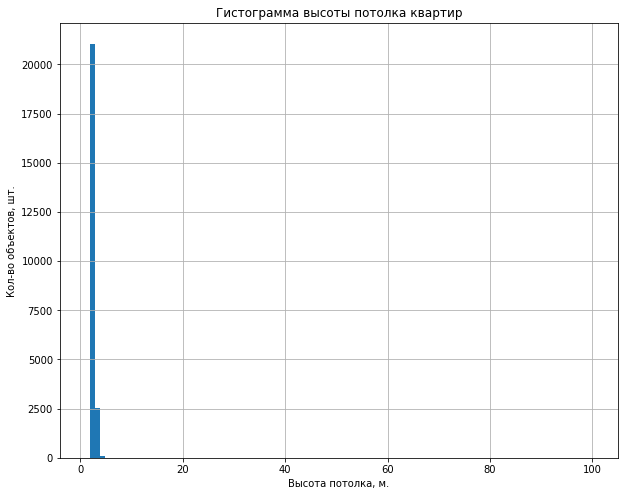

In [37]:
data['ceiling_height'].hist(figsize=(10, 8), bins=100)
plt.xlabel('Высота потолка, м.')
plt.ylabel('Кол-во объектов, шт.')
plt.title('Гистограмма высоты потолка квартир');

На ящике с усами есть объект, у которого высота потолка = 100 м. Это разумеется бессмыслица. Также имеется несколько значений больше 20 м. Это всё ошибочные значения. Внимание минимальным значениям уделим чуть позже.

In [38]:
# Выведем на экран количество уникальных значений в столбце `ceiling_height`
len(data['ceiling_height'].unique())

183

Всего 183 варианта высоты. Попробуем явно найти ошибочные замеры:

In [39]:
# Выведем на экран список этих значений
data['ceiling_height'].unique()

array([  2.7 ,   2.6 ,   2.8 ,   3.03,   2.5 ,   2.67,   2.56,   3.05,
         2.75,   2.9 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Видим несколько неправдоподобных значений, к примеру, 25 м. или 32 м. Скорее всего пользователи хотели указать вещественное число (2.5 м. и 3.2 м). Обработаем эти значения и заменим на верные.

In [40]:
# Найдем строки, где значение высоты потолка больше 24
# и разделим данное значение на 10
data.loc[data['ceiling_height'] > 24, 'ceiling_height'] /= 10

Согласно пункту 2.1 СНиП 2.08.01-85 "ЖИЛЫЕ ЗДАНИЯ" высота помещений от пола до потолка - не менее 2,5 м. Так уж и быть, чуть снизим планку (делаем скидку на недобросовестных застройщиков) и условимся, что ниже 2.4 м. высота от пола до потолка быть не может, поэтому избавимся от этих строк. Максимальная высота потолка никак не регламентируется, но будем объективны, в квартире едва-ли окажется потолок выше 10 м. Так что, строки, значения высоты потолка которых превышают 10 метров тоже уберем из таблицы.

In [41]:
# размерность до вычислений
data.shape

(23699, 23)

In [42]:
# Оставим в таблице только те строки, значение `ceiling_height` которых больше 2.4 метров и меньше 10 метров.
data = data.query('ceiling_height > 2.4 and ceiling_height < 10')
# размерность после вычислений
data.shape

(23649, 23)

50 аномальных квартир покинули наш датасет.

Самое время посмотреть распределение признака:

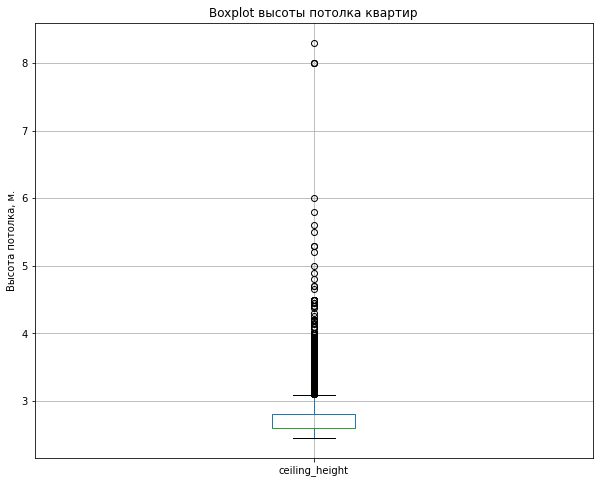

In [43]:
data.boxplot('ceiling_height', figsize=(10, 8))
plt.ylabel('Высота потолка, м.')
plt.title('Boxplot высоты потолка квартир');

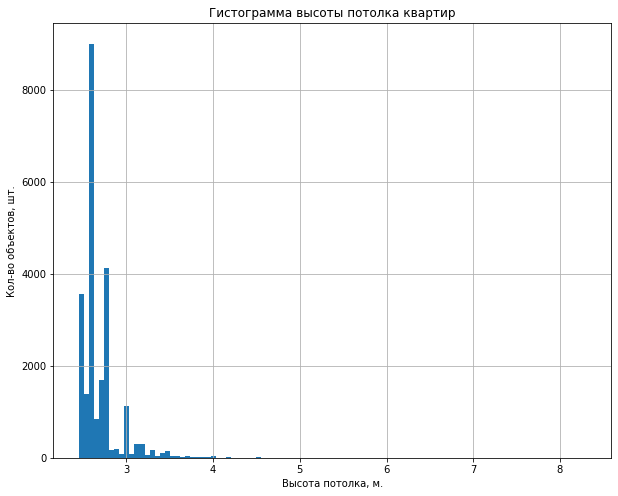

In [44]:
data['ceiling_height'].hist(figsize=(10, 8), bins=100)
plt.xlabel('Высота потолка, м.')
plt.ylabel('Кол-во объектов, шт.')
plt.title('Гистограмма высоты потолка квартир');

Минимальное значение высоты - 2.4 метра, большинство квартир имеют высоту потолка между 2.4 м. и 3 м., что довольно хорошо вписывается в реалии недвижимости.

**Столбцы `living_area` и `total_area`**

Рассмотрим боксплоты для двух признаков:

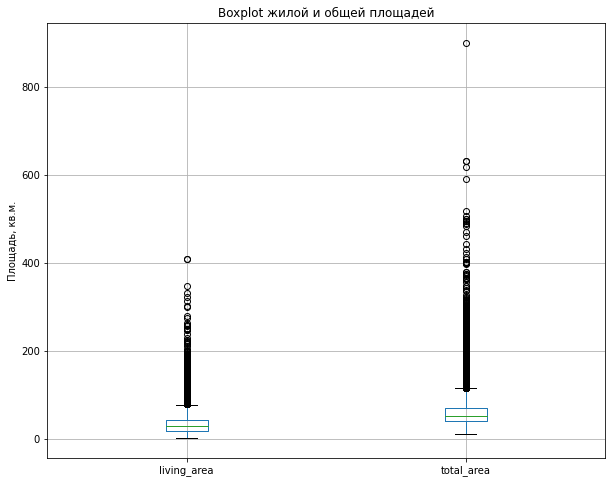

In [45]:
data.boxplot(['living_area', 'total_area'], figsize=(10, 8))
plt.ylabel('Площадь, кв.м.')
plt.title('Boxplot жилой и общей площадей');

На обоих графиках имеются выбросы, но нельзя однозначно заявить, что это ошибочные значения. В отличие от высоты потолка, площадь квартиры действительно может быть огромной, тут уж вопрос в цене квартиры.

При заполнении пропусков были использованы медианные значения квартилей. Но оказалось, что для некоторых объявлений такие значения не подходят, поскольку жилая площадь не может быть больше общей площади. 

Заменим в этих строках значения `living_area` на значение `living_area` = `total_area`- `kitchen_area`.

In [46]:
# Найдем строки, где `living_area` больше `total_area`
data[data['living_area'] > data['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_type
12040,5,1900000.0,15.0,2018-06-27,1,2.5,5.0,17.2,1,True,...,0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0,small
16949,9,1550000.0,15.0,2018-08-21,1,2.7,9.0,17.2,1,True,...,0,Санкт-Петербург,51048.0,16376.0,0.0,NaN,1.0,1079.0,42.0,small
17961,3,1400000.0,13.0,2017-12-03,1,2.6,9.0,17.2,1,True,...,0,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0,small
19546,3,1850000.0,13.0,2019-03-11,1,3.4,5.0,17.2,2,False,...,0,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0,small
19558,2,1686000.0,13.2,2018-12-17,1,2.6,5.0,17.2,1,True,...,0,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0,small


In [47]:
# С помощью логической индексации присвоим значением в столбце `living_area` у данных строк на значение [`total_area` - 1]
data.loc[data['living_area'] > data['total_area'], 'living_area'] = \
data.loc[data['living_area'] > data['total_area'], 'total_area'] - \
data.loc[data['living_area'] > data['total_area'], 'kitchen_area']
# проверим, остались ли строки, удовлетворяющие условию
data[data['living_area'] > data['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_type


Заполнили ошибочные данные на корректные.

**Столбец `rooms`**

Построим боксплот для количества комнат в квартире:

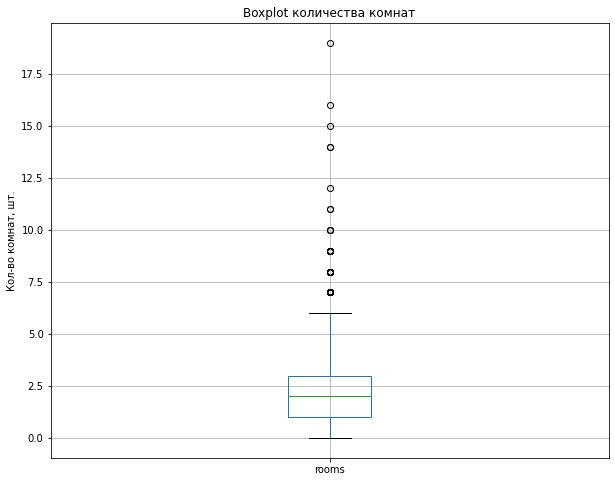

In [48]:
data.boxplot('rooms', figsize=(10, 8))
plt.ylabel('Кол-во комнат, шт.')
plt.title('Boxplot количества комнат');

Что касается количества комнат, то тут мы видим нижнюю границу в нуле. Т.е. количество комнат = 0. Это ошибочные данные, квартира не может быть без комнат, иначе это и не квартира вовсе.

Посмотрим на такие объекты:

In [49]:
data.loc[data['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_type
144,1,2450000.0,27.00,2017-03-30,0,2.6,24.0,15.50,2,True,...,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,small
349,4,2320000.0,25.00,2017-09-27,0,2.6,14.0,17.00,1,True,...,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,small
440,8,2480000.0,27.11,2018-03-12,0,2.6,17.0,24.75,4,True,...,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,small
508,0,3375000.0,34.40,2017-03-28,0,2.6,26.0,24.30,19,True,...,1,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,small
608,2,1850000.0,25.00,2019-02-20,0,2.6,10.0,17.20,7,True,...,0,поселок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,2.6,25.0,18.00,16,True,...,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,small
23442,0,2500000.0,27.70,2017-09-28,0,2.6,24.0,18.00,4,True,...,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0,small
23554,15,3350000.0,26.00,2018-09-07,0,2.6,19.0,17.20,8,True,...,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,small
23592,10,1450000.0,29.00,2017-11-11,0,2.6,9.0,18.00,8,True,...,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0,small


Вероятнее всего, данная ошибка связана с тем, что пользователь не указал в объявлении количество комнат.

На сегодняшний день действуют нормы, которые распространяются на строительство многоквартирных домов. Согласно данным нормам, минимальная площадь квартиры составляет:
- 1 комната | 28 кв.м.
- 2 комнаты | 44 кв.м.
- 3 комнаты | 56 кв.м.
- 4 комнаты | 70 кв.м.
- 5 комнат  | 84 кв.м.
- 6 комнат  | 103 кв.м.

Исходя из этой информации, заполним ошибочные данные на корректное количество комнат.

In [50]:
# размерность до вычислений
data.shape

(23649, 23)

In [51]:
# составим словарь из соотношений "комната: общая площадь"
room_area = {1: 28., 2: 44., 3: 56., 4: 70., 5:84., 6:103.}
# определим функцию для замены ошибочных данных на корректные
def fill_correct_rooms(rooms, area):
    data.loc[(data['rooms'] == 0) & (data['total_area'] <= area), 'rooms'] = rooms

# применим функцию для каждой пары словаря `room_area`
for rooms, area in room_area.items():
    fill_correct_rooms(rooms, area)
    
# размерность после вычислений
data.shape

(23649, 23)

Посмотрим, остались ли записи с 0 комнат:

In [52]:
data.loc[data['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_type
19392,5,71000000.0,371.0,2018-07-26,0,3.57,7.0,51.3,6,True,...,0,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0,big


Всего 1 запись, но общая площадь у этого объекта гораздо больше, чем мы могли предположить. По сути, у этой квартиры может быть хоть 20 комнат, хоть 5 (очень больших). Выйти из этой ситуации предлагаю следующим образом: мы возьмем срез по квартирам с общей площадью между 350 и 400 метров, возьмем количество комнат у таких квартир и найдем медиану - это значение подставим записи выше (id = 19392).

In [53]:
# медиана
med = data.loc[
    (data['total_area'] > 350) & 
    (data['total_area'] < 400), 'rooms'
].median()
data.loc[data['rooms'] == 0, 'rooms'] = med

# размерность после вычислений
data.shape

(23649, 23)

Посмотрим, удалось ли нам избавиться от квартир без комнат:

In [54]:
data.loc[data['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_type


Finally.

**Промежуточный вывод**

Удалось избавиться от неккоректных значений в столбце `ceiling_height`: провели замену значений там, где это логично, остальные аномалии удалили из таблицы.

Также несколько строк имели следующую аномалию: значение `total_area` была меньше значения `living_area`. Изменили в этих строках значения в столбце `living_area` на (`total_area` - `kitchen_area`).

В столбце `last_price` устранили 1 неккоректное значение.

Признак `rooms` хранил в себе неккоректные данные (были квартиры с 0 комнатами). Ошибочные записи заполнили в соответствии с актуальными правилами застройки многоэтажек относительно общей площади.

Больше аномалий выявлено не было.

## Рассчитаем и добавим в таблицу новые столбцы

**Рассчитаем цену одного квадратного метра для каждого объявления. Для этого разделим стоимость `last_price` на общую площадь помещения `total_area`.**

In [55]:
# размерность до вычислений
data.shape

(23649, 23)

In [56]:
data['one_square_meter_cost'] = data['last_price'] / data['total_area']
# размерность после вычислений
data.shape

(23649, 24)

#### Добавим в таблицу новый столбец с номером дня недели публикации объявления

In [57]:
# размерность до вычислений
data.shape

(23649, 24)

In [58]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
# размерность после вычислений
data.shape

(23649, 25)

#### Добавим новый столбец с номером месяца публикации объявления

In [59]:
# размерность до вычислений
data.shape

(23649, 25)

In [60]:
data['month_exposition'] = data['first_day_exposition'].dt.month
# размерность после вычислений
data.shape

(23649, 26)

#### Добавим новый столбец с годом публикации объявления

In [61]:
# размерность до вычислений
data.shape

(23649, 26)

In [62]:
data['year_exposition'] = data['first_day_exposition'].dt.year
# размерность после вычислений
data.shape

(23649, 27)

#### Добавим новый столбец с типом этажа квартиры (значения - "первый", "последний", "другой")

In [63]:
# размерность до вычислений
data.shape

(23649, 27)

In [64]:
# Объявим функцию `floor_typing`, которая в качестве параметра принимает на вход 1 строку таблицы
def floor_typing(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
# Объявим новый столбец `floor_type`, куда положим результат выполнения функции `floor_typing`
data['floor_type'] = data.apply(floor_typing, axis=1)

# размерность после вычислений
data.shape

(23649, 28)

#### Добавим новый столбец с расстоянием до центра города в км.

In [65]:
# размерность до вычислений
data.shape

(23649, 28)

In [66]:
data['km_to_center'] = round(data['cityCenters_nearest'] / 1000)
# размерность после вычислений
data.shape

(23649, 29)

Посмотрим на результат:

In [67]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,total_area_type,one_square_meter_cost,weekday_exposition,month_exposition,year_exposition,floor_type,km_to_center
0,20,13000000.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8,True,...,2.0,755.0,NaN,big,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1.0,2.60,11.0,18.6,1,True,...,0.0,NaN,81.0,pre-medium,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2.0,2.60,5.0,34.3,4,True,...,2.0,574.0,558.0,medium,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3.0,2.80,14.0,51.3,9,True,...,3.0,234.0,424.0,big,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13,True,...,1.0,48.0,121.0,big,100000.000000,1,6,2018,другой,8.0


Новые признаки рассчитаны корректно, все данные на месте.

**Промежуточный вывод**

Добавили в таблицу `data` следующие столбцы:
- `one_square_meter_cost` (цена одного квадратного метра)
- `weekday_exposition` (день недели публикации объявления)
- `month_exposition` (месяц публикации объявления)
- `year_exposition` (год публикации объявления)
- `floor_type` (тип этажа квартиры)
- `km_to_center` (асстояние до центра города в километрах)


## Исследовательский анализ данных

### Изучим параметры объектов

Для каждого параметра построим сабплот с гистограммой и боксплотом.

**Общая площадь (`total_area`)**

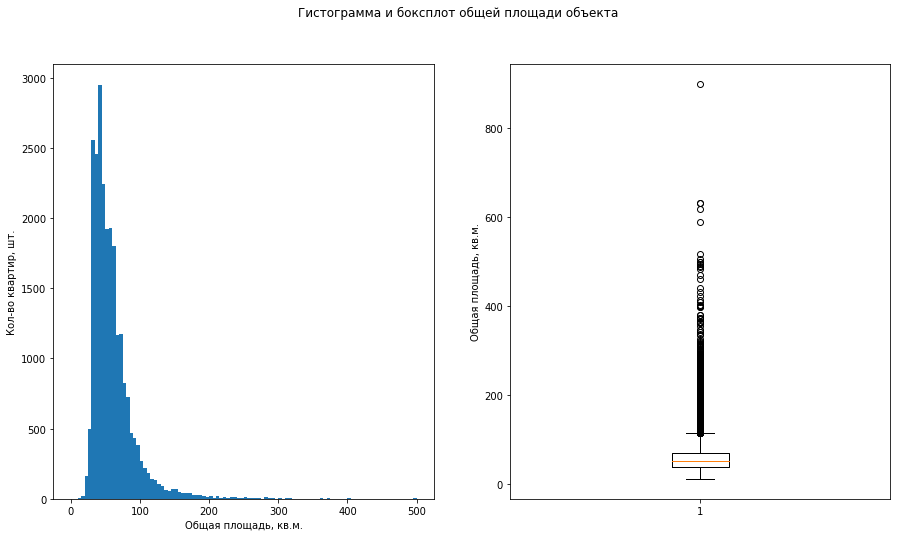

In [68]:
x = data['total_area']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Гистограмма и боксплот общей площади объекта')
ax1.hist(x, bins=100, range=(0, 500))
ax1.set_xlabel('Общая площадь, кв.м.')
ax1.set_ylabel('Кол-во квартир, шт.')
ax2.boxplot(x)
ax2.set_ylabel('Общая площадь, кв.м.');

Подавляющее число квартир имеют общую площадь от 30 до 100 кв.м. Квартиры с площадью более 200 кв.м. встречаются довольно редко.

##### Жилая площадь (`living_area`)

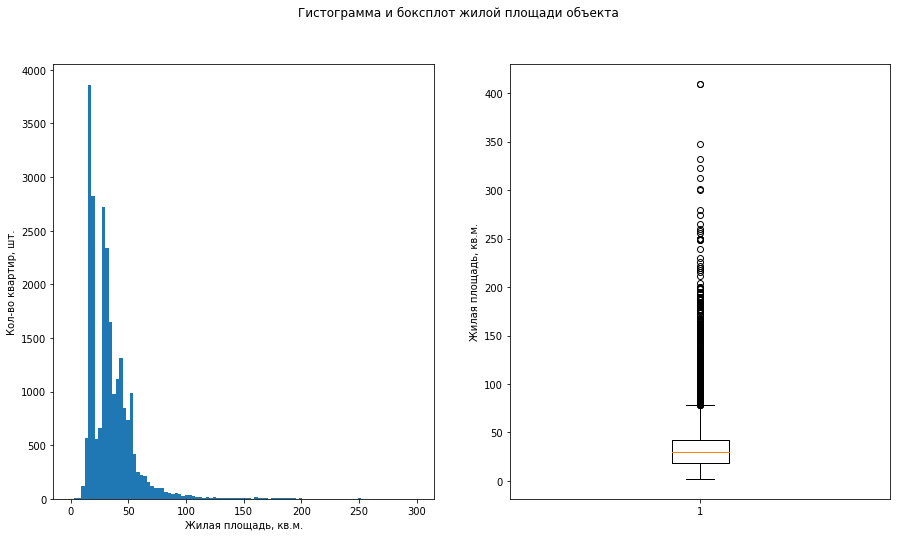

In [69]:
x = data['living_area']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Гистограмма и боксплот жилой площади объекта')
ax1.hist(x, bins=100, range=(0, 300))
ax1.set_xlabel('Жилая площадь, кв.м.')
ax1.set_ylabel('Кол-во квартир, шт.')
ax2.boxplot(x)
ax2.set_ylabel('Жилая площадь, кв.м.');

Наиболее типичным значением является жилая площадь от 20 до 50 метров. В целом, бОльшая часть объявлений находится между значениями 10 и 70 метров. Значения меньше 10 встречаются, но редко, так же как и значения больше 150 метров.

##### Площадь кухни (`kitchen_area`)

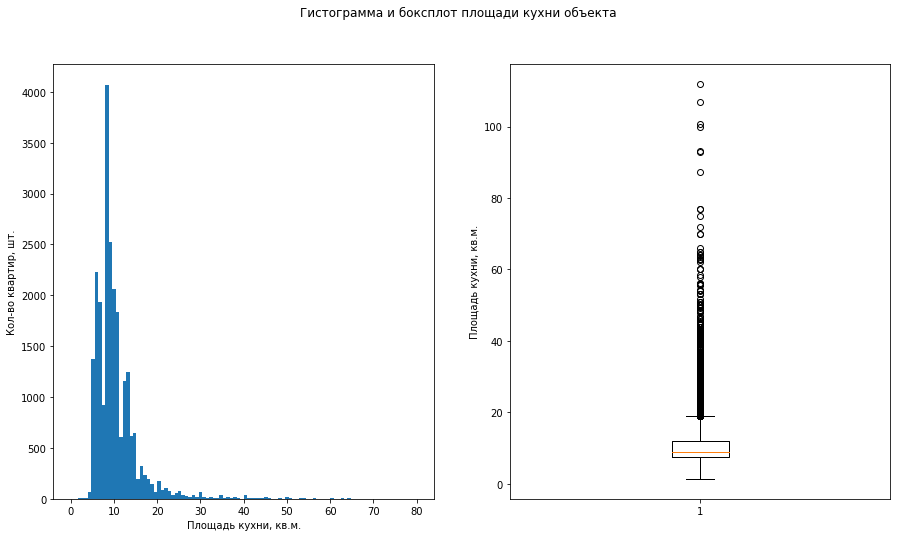

In [70]:
x = data['kitchen_area']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Гистограмма и боксплот площади кухни объекта')
ax1.hist(x, bins=100, range=(0, 80))
ax1.set_xlabel('Площадь кухни, кв.м.')
ax1.set_ylabel('Кол-во квартир, шт.')
ax2.boxplot(x)
ax2.set_ylabel('Площадь кухни, кв.м.');

Кухни площадью от 5 до 15 метров являются самыми распространенными (более 14000 вхождений). Кухни больше 60 метров практически не встречаются.

##### Цена объекта (`last_price`)

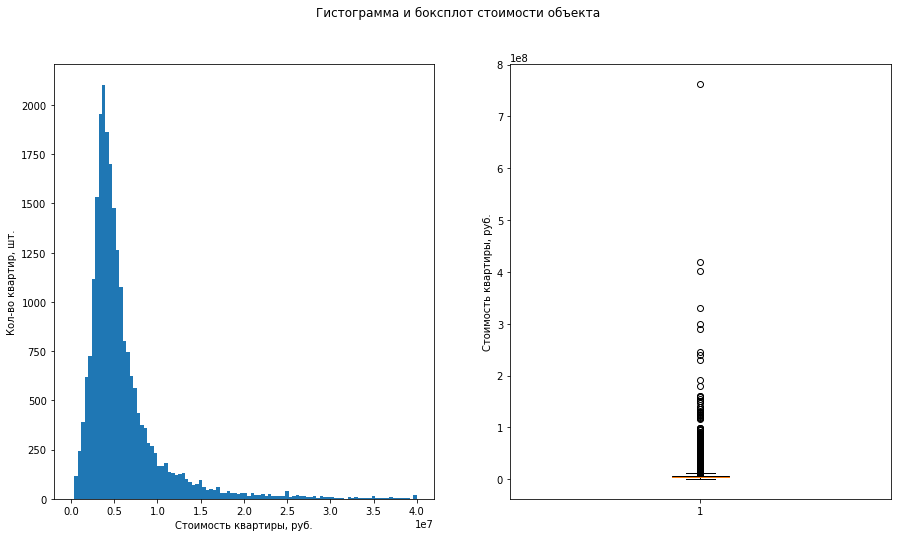

In [71]:
x = data['last_price']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Гистограмма и боксплот стоимости объекта')
ax1.hist(x, bins=100, range=(0, 40000000))
ax1.set_xlabel('Стоимость квартиры, руб.')
ax1.set_ylabel('Кол-во квартир, шт.')
ax2.boxplot(x)
ax2.set_ylabel('Стоимость квартиры, руб.');

Боксплот в данном случае менее информативен, нежели гистограмма, из-за одной аномалии. Тем не менее, квартиры стоимостью от 4 млн.руб. до 5 млн.руб. встречаются на порядок чаще других. Объекты стоимостью свыше 30 млн.руб. встречаются не часто.

##### Количество комнат (`rooms`)

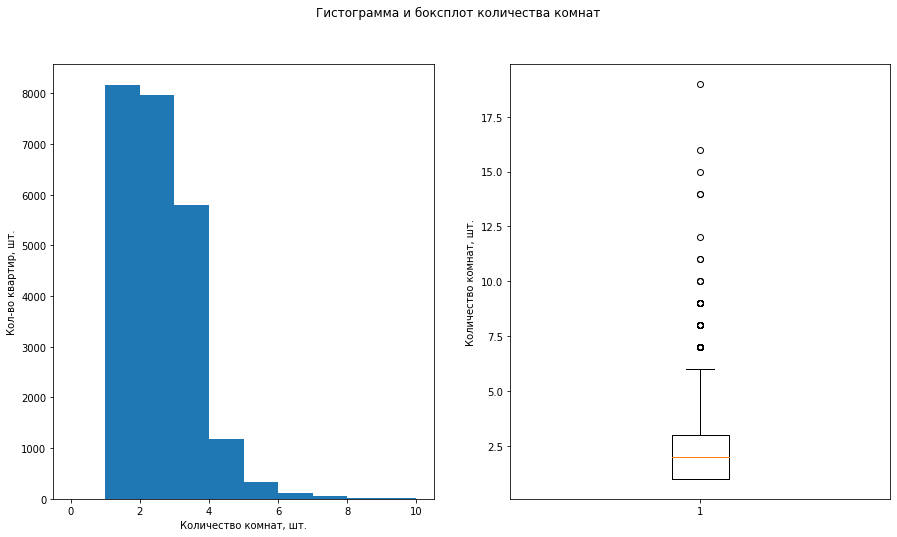

In [72]:
x = data['rooms']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Гистограмма и боксплот количества комнат')
ax1.hist(x, bins=10, range=(0, 10))
ax1.set_xlabel('Количество комнат, шт.')
ax1.set_ylabel('Кол-во квартир, шт.')
ax2.boxplot(x)
ax2.set_ylabel('Количество комнат, шт.');

В основном в наших данных встречаются квартиры с 2-4 комнатами (пик приходится на 1-2 комнаты). Больше 7 комнат - редкость.

##### Высота потолков (`ceiling_height`)

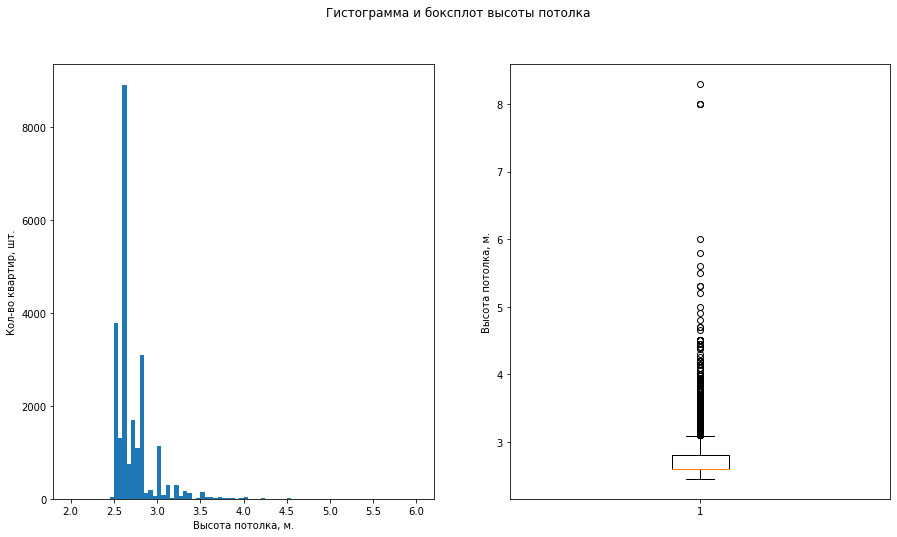

In [73]:
x = data['ceiling_height']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Гистограмма и боксплот высоты потолка')
ax1.hist(x, bins=80, range=(2, 6))
ax1.set_xlabel('Высота потолка, м.')
ax1.set_ylabel('Кол-во квартир, шт.')
ax2.boxplot(x)
ax2.set_ylabel('Высота потолка, м.');

Чаще всего встречается высота ~2.6-3.0 метров. Потолки более 4 метров встречаются крайне редко. 

##### Этаж квартиры (`floor`)

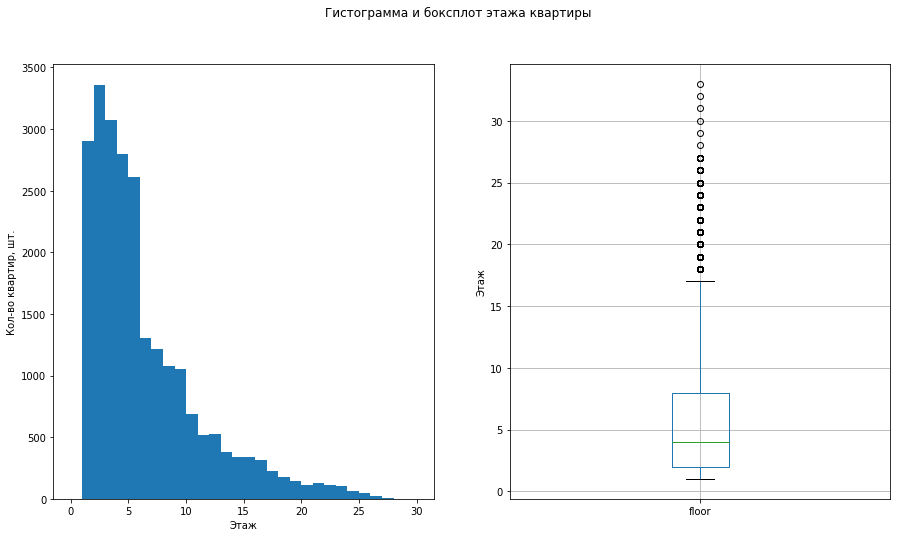

In [74]:
x = data['floor']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Гистограмма и боксплот этажа квартиры')
ax1.hist(x, bins=30, range=(0, 30))
ax1.set_xlabel('Этаж')
ax1.set_ylabel('Кол-во квартир, шт.')
ax2 = data.boxplot('floor')
ax2.set_ylabel('Этаж');

Чаще всего продают квартиру люди, которые проживают на 2-м этаже. Основная же часть квартир находится на этаже до 10. Выше 25 этажа практически никто не живет.

##### Тип этажа квартиры (`floor_type`)

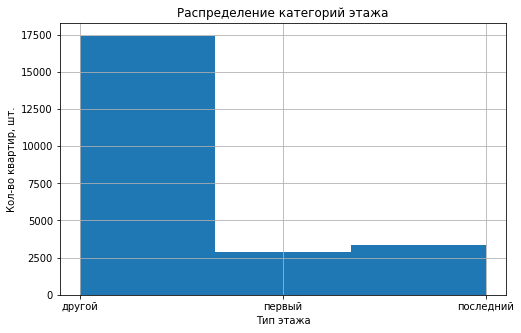

In [75]:
data['floor_type'].hist(bins=3, figsize=(8, 5))
plt.title('Распределение категорий этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Кол-во квартир, шт.');

Ожидаемо тип этажа "другой" встречается чаще других (~17500 вхождений). Квартиры на последнем этаже продают немного чаще квартир на первом этаже.

##### Общее количество этажей в доме (`floors_total`)

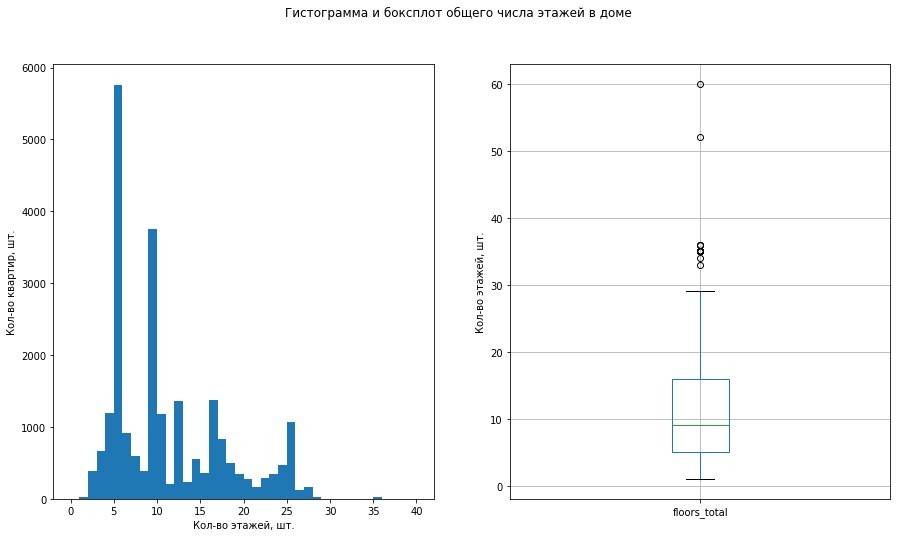

In [76]:
x = data['floors_total']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Гистограмма и боксплот общего числа этажей в доме')
ax1.hist(x, bins=40, range=(0, 40))
ax1.set_xlabel('Кол-во этажей, шт.')
ax1.set_ylabel('Кол-во квартир, шт.')
ax2 = data.boxplot('floors_total')
ax2.set_ylabel('Кол-во этажей, шт.');

Распределение имеет 2 выраженных пика. Первый (наибольший) приходится на пятиэтажки, второй на девятиэтажки. Дома выше 25 этажей встретить непросто.

#####  Расстояние до центра города в метрах (`cityCenters_nearest`)

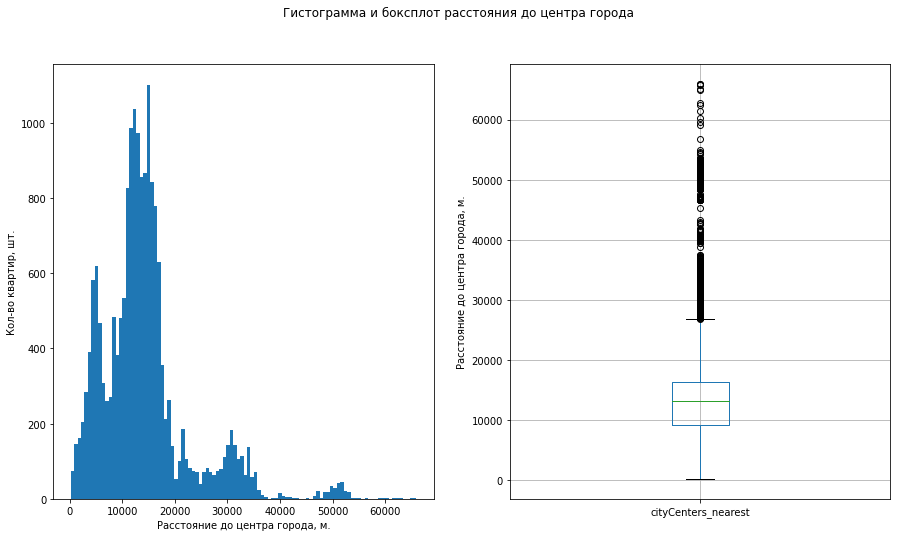

In [77]:
x = data['cityCenters_nearest']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Гистограмма и боксплот расстояния до центра города')
ax1.hist(x, bins=100)
ax1.set_xlabel('Расстояние до центра города, м.')
ax1.set_ylabel('Кол-во квартир, шт.')
ax2 = data.boxplot('cityCenters_nearest')
ax2.set_ylabel('Расстояние до центра города, м.');

Наиболее часто попадаются квартиры с расстоянием до центра города от 0 м. до 18000 м. Основная часть расположилась на расстоянии до 20000 м. до центра города. Более 35 км. встречается редко, хотя имеется небольшой подъем на 48-53 км.

##### Расстояние до ближайшего аэропорта (`airport_nearest`)

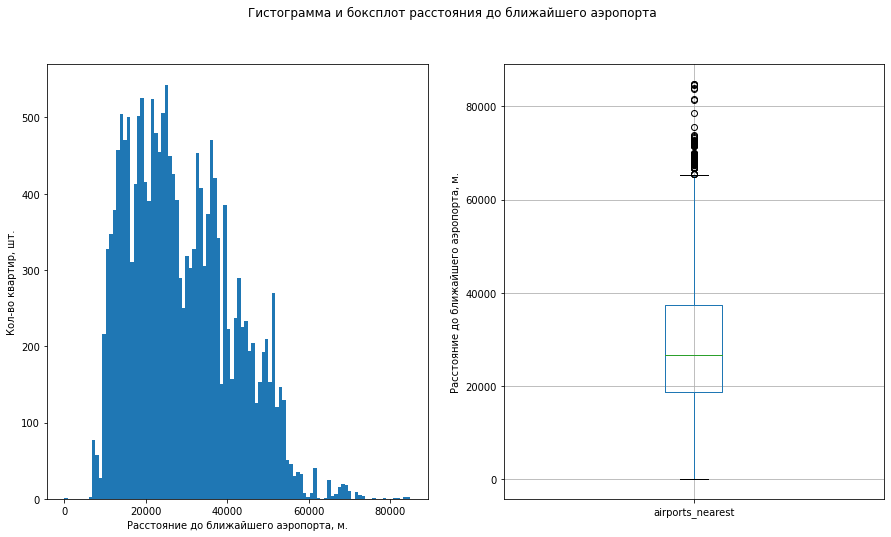

In [78]:
x = data['airports_nearest']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Гистограмма и боксплот расстояния до ближайшего аэропорта')
ax1.hist(x, bins=100)
ax1.set_xlabel('Расстояние до ближайшего аэропорта, м.')
ax1.set_ylabel('Кол-во квартир, шт.')
ax2 = data.boxplot('airports_nearest')
ax2.set_ylabel('Расстояние до ближайшего аэропорта, м.');

Некоторое количество квартир расположены очень близко к аэропорту (едва заметно на гистограмме и явно видно на боксплоте). Данные расположились довольно "широко", боксплот говорит, что первый квартиль равен чуть менее 20000 метров, а 3-й квартиль ~38000 м.

##### Расстояние до ближайшего парка (`parks_nearest`)

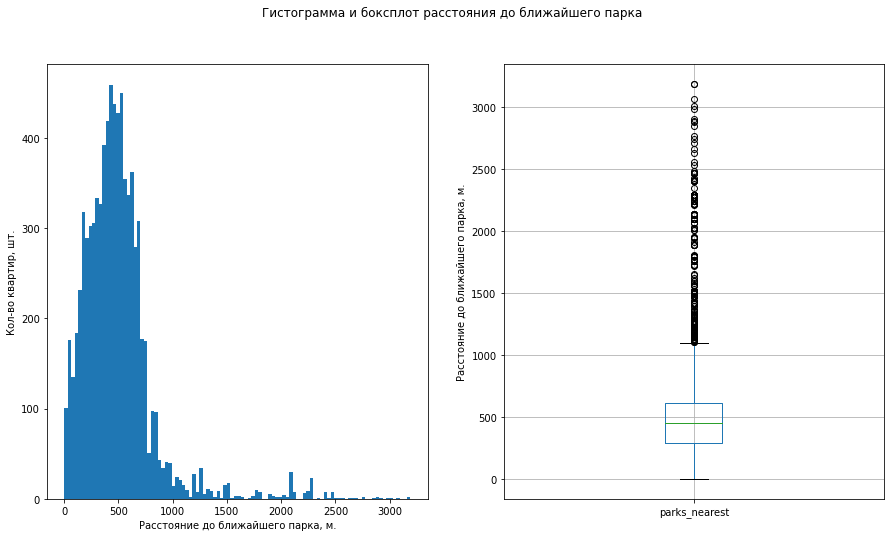

In [79]:
x = data['parks_nearest']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Гистограмма и боксплот расстояния до ближайшего парка')
ax1.hist(x, bins=100)
ax1.set_xlabel('Расстояние до ближайшего парка, м.')
ax1.set_ylabel('Кол-во квартир, шт.')
ax2 = data.boxplot('parks_nearest')
ax2.set_ylabel('Расстояние до ближайшего парка, м.');

Основная часть данных находится на расстоянии до 1000 метров до ближайшего парка. Выбросы (аномалии) на боксплоте начинаются уже с ~1100 метров.

##### День и месяц публикации объявления (`weekday_exposition`, `month_exposition`)

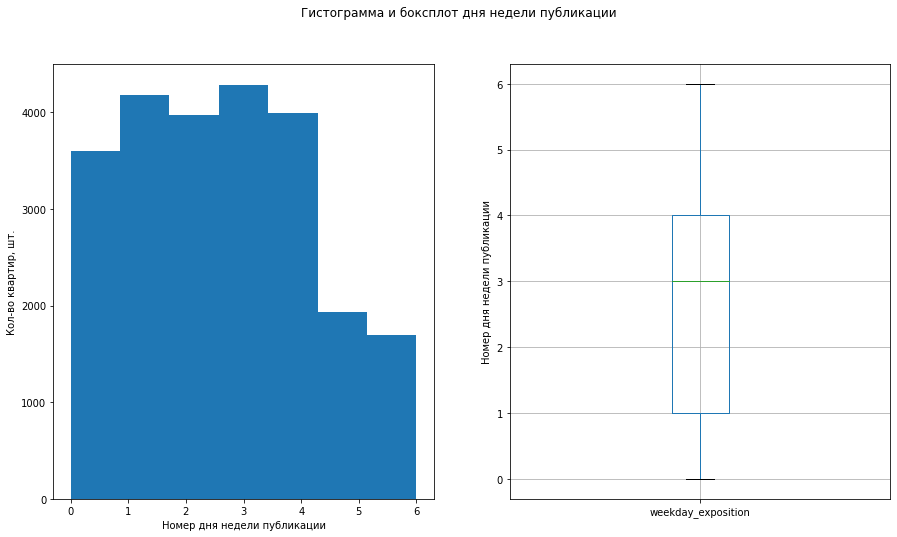

In [80]:
x = data['weekday_exposition']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Гистограмма и боксплот дня недели публикации')
ax1.hist(x, bins=7)
ax1.set_xlabel('Номер дня недели публикации')
ax1.set_ylabel('Кол-во квартир, шт.')
ax2 = data.boxplot('weekday_exposition')
ax2.set_ylabel('Номер дня недели публикации');

Напомню, 0-й день недели - понедельник, 6-й - воскресенье.

Таким образом, эти графики говорят нам, что пользователи, в основном, публикуют свои объявления по будням и гораздо реже по выходным.

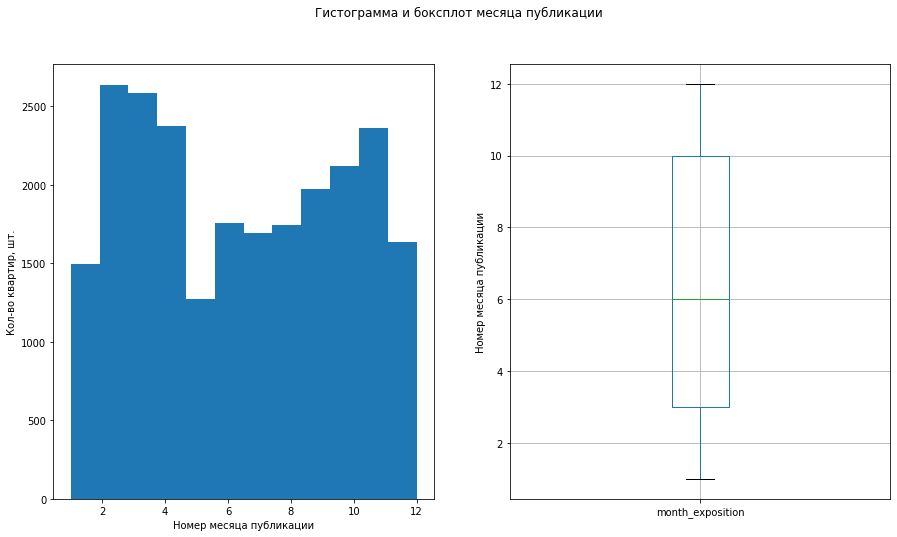

In [81]:
x = data['month_exposition']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Гистограмма и боксплот месяца публикации')
ax1.hist(x, bins=12)
ax1.set_xlabel('Номер месяца публикации')
ax1.set_ylabel('Кол-во квартир, шт.')
ax2 = data.boxplot('month_exposition')
ax2.set_ylabel('Номер месяца публикации');

Что касается месяца публикации объявления, то тут в лидерах февраль (2), март (3) и апрель (4), немного меньше, чем в апреле опубликовано объявлений в ноябре (11). Меньше всего объявлений насчитывается в мае (5) и январе (1). Может все дело в праздниках? Пользователи неохотно решаются на подобного рода перемены в своей жизни во время праздников (?)

**Промежуточный вывод**

Построили гистограмму для каждого параметра, описали наблюдения в ячейках типа `Markdown`.

### Как быстро продавались квартиры?

Для ответа на вопрос выше воспользуемся средним и медианным значениями столбца `days_exposition`, а также построим гистограмму для наглядного наблюдения.

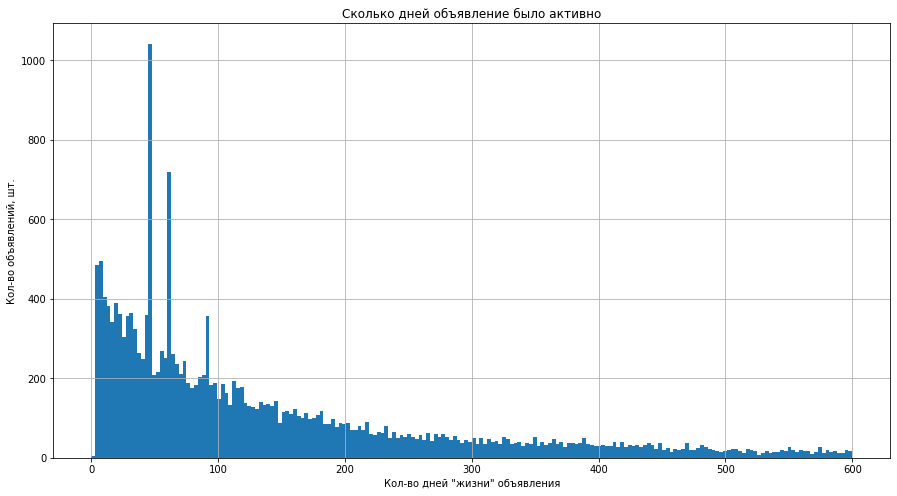

In [82]:
data['days_exposition'].hist(bins=200, figsize=(15, 8), range=(0, 600))
plt.title('Сколько дней объявление было активно')
plt.xlabel('Кол-во дней "жизни" объявления')
plt.ylabel('Кол-во объявлений, шт.');

У нас имеются несколько пиковых значений - количество дней, в течение которых квартиры продаются чаще других объявлений. Такими у нас являются ~45 дней, ~60 дней и ~90 дней выделяется на фоне соседних частот. Также, довольно часто продаются квартиры в первый месяца. График показывает расределение Пуассона.

In [83]:
data['days_exposition'].describe()

count    20475.000000
mean       181.025201
std        219.877094
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медианное значение практически в 2 раза меньше среднего. Это говорит о наличии выбросов в данных.

В среднем, согласно значению медианы, пользователь успевал найти покупателя за 95 дней. Согласно среднему значению - за 181 день.

В целом, квартиры, которые были проданы за 95 дней и быстрее, можно считать быстро проданными. Необычно долгими - со сроком "жизни" объявления 300+ дней.

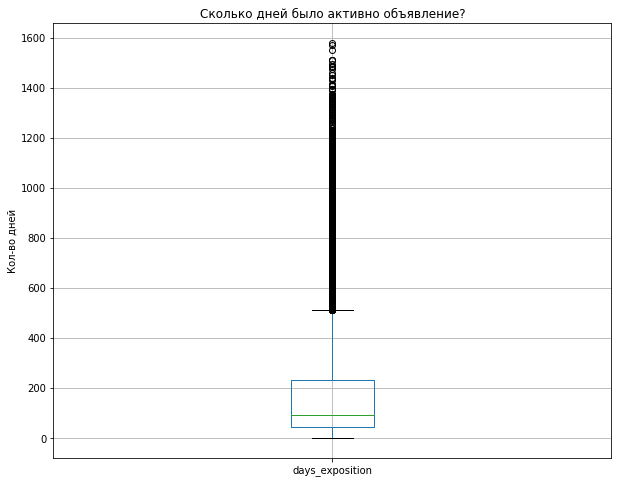

In [84]:
# С помощью метода boxplot() построим "ящик с усами" для столбца `days_exposition`
data.boxplot('days_exposition', figsize=(10, 8))
plt.ylabel('Кол-во дней')
plt.title('Сколько дней было активно объявление?');

Боксплот показывает, что имеется немало аномальных объявлений, у которых срок жизни объявления превышает 600 дней.

Посмотрим на такие записи:

In [85]:
data.loc[data['days_exposition'] > 600].T

,23,35,42,43,61,76,98,109,145,201,...,23588,23598,23627,23638,23648,23655,23664,23672,23675,23697
total_images,11,6,13,13,18,12,11,2,6,5,...,7,8,11,8,14,1,5,5,8,13
last_price,2950000.0,15500000.0,22000000.0,9330000.0,7990000.0,2800000.0,11700000.0,7497600.0,8290000.0,10880000.0,...,8100000.0,4300000.0,6300000.0,4920000.0,10100000.0,2414306.0,9000000.0,3000000.0,3550000.0,11475000.0
total_area,32.0,149.0,161.8,48.0,74.0,55.1,80.0,62.5,77.0,123.1,...,69.0,33.4,42.3,76.26,78.0,40.5,110.0,30.8,39.5,76.75
first_day_exposition,2016-10-29 00:00:00,2017-06-26 00:00:00,2015-07-08 00:00:00,2017-01-10 00:00:00,2017-08-24 00:00:00,2016-05-14 00:00:00,2014-12-10 00:00:00,2015-12-08 00:00:00,2015-09-21 00:00:00,2015-11-12 00:00:00,...,2015-10-14 00:00:00,2016-03-29 00:00:00,2017-01-27 00:00:00,2014-12-25 00:00:00,2017-05-12 00:00:00,2016-09-08 00:00:00,2015-12-10 00:00:00,2016-06-08 00:00:00,2016-10-03 00:00:00,2017-03-28 00:00:00
rooms,1.0,5.0,4.0,2.0,2.0,3.0,3.0,2.0,2.0,6.0,...,2.0,1.0,1.0,3.0,3.0,1.0,4.0,1.0,1.0,2.0
ceiling_height,2.6,2.8,2.8,3.0,2.8,2.6,2.8,2.6,2.77,3.2,...,2.6,2.58,2.6,2.8,3.27,2.56,3.36,2.6,2.6,3.0
floors_total,9.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,16.0,5.0,...,10.0,20.0,10.0,15.0,5.0,18.0,7.0,5.0,16.0,17.0
living_area,17.7,104.0,80.9,28.0,43.0,38.4,55.1,35.5,40.0,89.0,...,35.5,15.1,16.3,42.55,48.6,19.6,64.6,16.1,19.0,51.3
floor,9,4,2,4,4,1,3,5,5,2,...,8,6,4,13,5,10,5,3,13,12
is_apartment,True,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,False,True,True,True,True


Так мало что понятно.

Сравним описательую статистику среза данных с `days_exposition` > 600 и `days_exposition` <= 600:

In [86]:
data.loc[data['days_exposition'] > 600].describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
total_images,1198.00000,8.92487,5.55607,0.00000,5.00000,8.00000,13.00000,24.00000
last_price,1198.00000,8448304.46244,12462803.79533,490000.00000,3700000.00000,5450000.00000,8990000.00000,190870000.00000
total_area,1198.00000,71.53484,45.21357,18.00000,43.00000,60.00000,84.43250,507.00000
rooms,1198.00000,2.35977,1.27699,1.00000,1.00000,2.00000,3.00000,16.00000
ceiling_height,1198.00000,2.75801,0.28768,2.45000,2.60000,2.65000,2.80000,5.60000
floors_total,1194.00000,9.96147,6.27187,2.00000,5.00000,9.00000,13.00000,28.00000
living_area,1198.00000,40.95537,28.29596,10.00000,20.77500,34.10000,50.00000,301.50000
floor,1198.00000,5.47579,4.65993,1.00000,2.00000,4.00000,7.00000,25.00000
kitchen_area,1198.00000,11.78124,7.17094,4.00000,8.00000,10.00000,13.00000,77.00000
balcony,1198.00000,0.51002,0.90269,0.00000,0.00000,0.00000,1.00000,5.00000


In [87]:
data.loc[data['days_exposition'] <= 600].describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
total_images,19277.00000,9.65835,5.66174,0.00000,6.00000,9.00000,14.00000,50.00000
last_price,19277.00000,6136950.13763,10752488.30306,430000.00000,3400000.00000,4500000.00000,6400000.00000,763000000.00000
total_area,19277.00000,58.11332,33.13284,12.00000,39.20000,50.10000,67.00000,900.00000
rooms,19277.00000,2.01717,1.02266,1.00000,1.00000,2.00000,3.00000,19.00000
ceiling_height,19277.00000,2.68539,0.22510,2.45000,2.60000,2.60000,2.75000,8.30000
floors_total,19204.00000,10.92283,6.67130,1.00000,5.00000,9.00000,16.00000,60.00000
living_area,19277.00000,33.02156,20.09106,2.00000,18.20000,29.70000,41.00000,409.70000
floor,19277.00000,6.02205,4.96186,1.00000,2.00000,4.00000,8.00000,33.00000
kitchen_area,19277.00000,10.23609,5.29502,2.00000,7.30000,9.00000,11.60000,112.00000
balcony,19277.00000,0.59574,0.95027,0.00000,0.00000,0.00000,1.00000,5.00000


**Промежуточный вывод**

Наши наблюдения:
- средняя стоимость в "долгих" объявлениях почти на 2.5 млн.руб. больше "недолгих", медиана больше почти на миллион руб.;
- средняя общая площадь у аномалий также больше (на 13 кв.м.), медиана больше на 10 кв.м.;
- средняя стоимость 1 кв.м. у аномальных объявлений дороже (на 7 т.руб.), чем у "нормальных" объявлений.

Остальные признаки мало различаются \ не дают логичных объяснений. Но и без этого можно прийти к определенному выводу о причине более долгой продажи аномальных объявлений. Оказалось, что аномалии, в среднем, это квартиры бОльшего размера, а соответственно, бОльшей стоимости. Отчего приходим к выводу, что недорогие объекты недвижимости покупаются чаще, чем дорогие. Это правило действует не всегда, однако, зависимость определенно присутствует.

Так же построили гистограмму для столбца `days_exposition`, нашли среднее и медианное значения. Определили несколько пиков в основной части распределения (45 дней, 60 дней, 90 дней). Решили, что быстрой продажей можно считать квартиры, проданные за 95 дней и меньше. Необычно долгой продажей - квартиры, проданные за 300 дней или больше.

### Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта.

**Зависимость цены (`total_price`) от общей площади (`total_area`)**

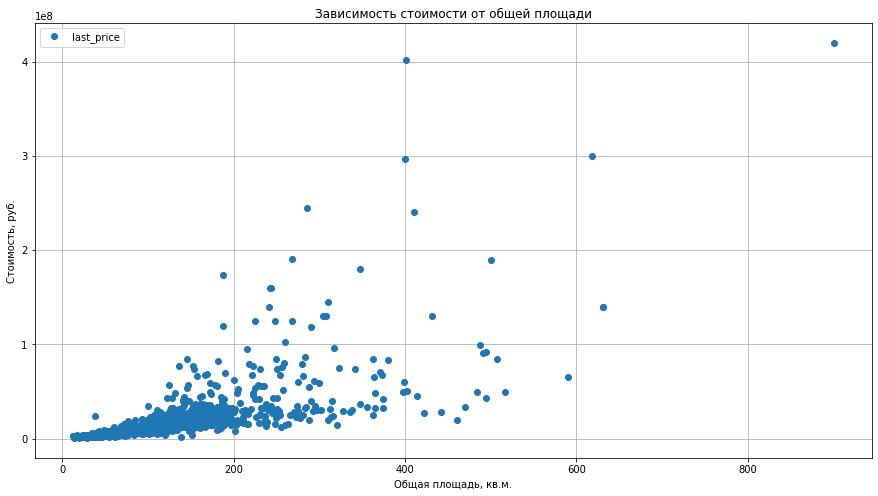

In [88]:
# Построим график зависимости цены объекта от общей площади
(
    data
    .pivot_table(index='total_area', values='last_price')
    .plot(style='o', grid=True, figsize=(15, 8))
)
plt.title('Зависимость стоимости от общей площади')
plt.xlabel('Общая площадь, кв.м.')
plt.ylabel('Стоимость, руб.');

В целом, можно сказать, что линейная зависимость присутствует для квартир с общей площадью до 200 метров. Для квартир с общей площадью более 200 метров зависимость приобретает хаотичный характер.

In [89]:
# Выведем на экран коэффициент корреляции `total_area` и `last_price`
data['total_area'].corr(data['last_price'])

0.6537742582020281

Коэффициент корреляции подтверждает слабую линейную зависимость.

**Зависимость цены (`total_price`) от жилой площади (`living_area`)**

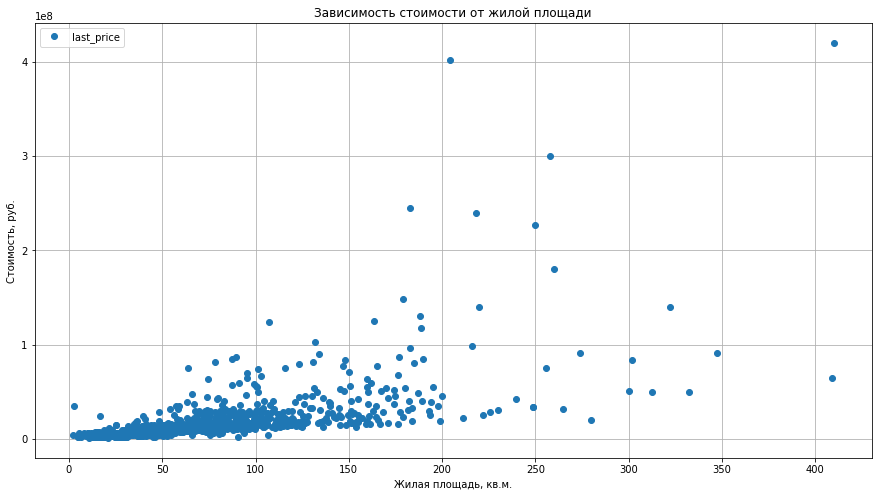

In [90]:
# Построим график зависимости цены объекта от жилой площади
(
    data
    .pivot_table(index='living_area', values='last_price')
    .plot(style='o', grid=True, figsize=(15, 8))
)
plt.title('Зависимость стоимости от жилой площади')
plt.xlabel('Жилая площадь, кв.м.')
plt.ylabel('Стоимость, руб.');

Имеется схожесть с зависимостью цены от общей площади. До 200 метров зависимость "старается" показаться линейной. После 200 метров начинается разброс значений.

In [91]:
# Выведем на экран коэффициент корреляции `living_area` и `last_price`
data['living_area'].corr(data['last_price'])

0.5540220075560994

Коэффициент корреляции этих двух параметров показывает ещё более слабую линейную зависимость.

**Зависимость цены (`total_price`) от площади кухни (`kitchen_area`)**

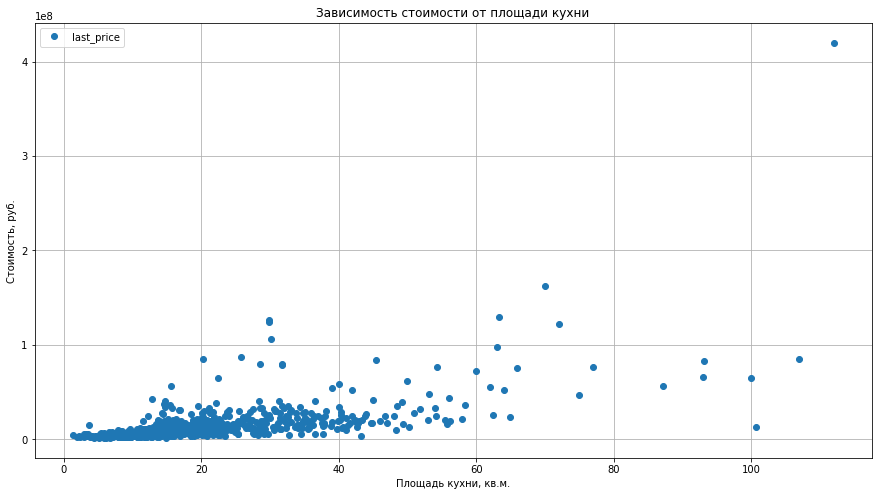

In [92]:
# Построим график зависимости цены объекта от площади кухни
(
    data
    .pivot_table(index='kitchen_area', values='last_price')
    .plot(style='o', grid=True, figsize=(15, 8))
)
plt.title('Зависимость стоимости от площади кухни')
plt.xlabel('Площадь кухни, кв.м.')
plt.ylabel('Стоимость, руб.');

От 0 до 40 метров значения распределились кучно, с несколькими выбросами. От 40 до 60 начинается более широкий разброс, но выбросов меньше и их значения меньше.

In [93]:
data['kitchen_area'].corr(data['last_price'])

0.4537578872518982

Коэффициент корреляции этой пары параметров еще ниже, чем в двух предыдущих парах. Говорить о какой-то линейной зависимости очень сложно.

**Зависимость цены (`total_price`) от количества комнат (`rooms`)**

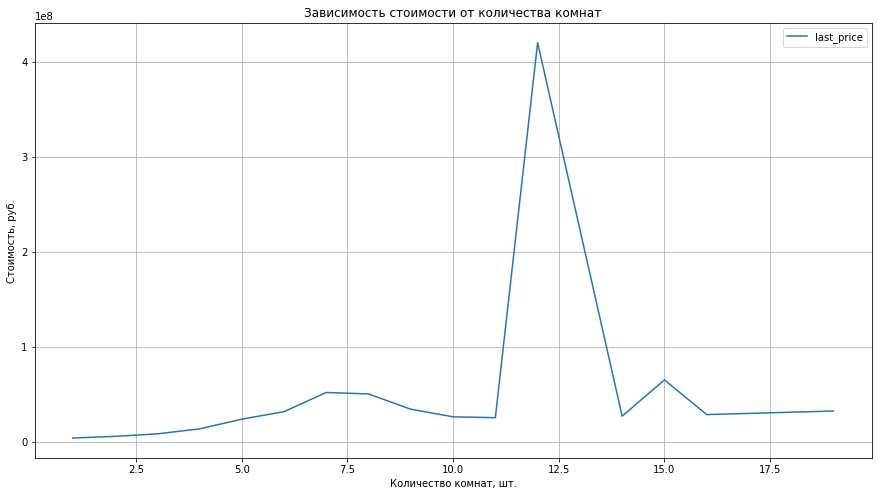

In [94]:
# Построим график зависимости цены объекта от количества комнат
(
    data
    .pivot_table(index='rooms', values='last_price')
    .plot(grid=True, figsize=(15, 8))
)
plt.title('Зависимость стоимости от количества комнат')
plt.xlabel('Количество комнат, шт.')
plt.ylabel('Стоимость, руб.');

In [95]:
data['rooms'].corr(data['last_price'])

0.3663821137781019

Значения до 7 комнат расположились с квадратной зависимостью. Далее идет небольшое плато, с последующим снижением цены объекта вплоть до 11 квартир. Большой выброс расположен на значении 12 комнат. И как мы видим, коэффициент корреляции, на данный момент, самый низкий среди уже изученных пар.

##### Зависимость цены (`total_price`) от типа этажа, на котором находится объект (`floor_type`)

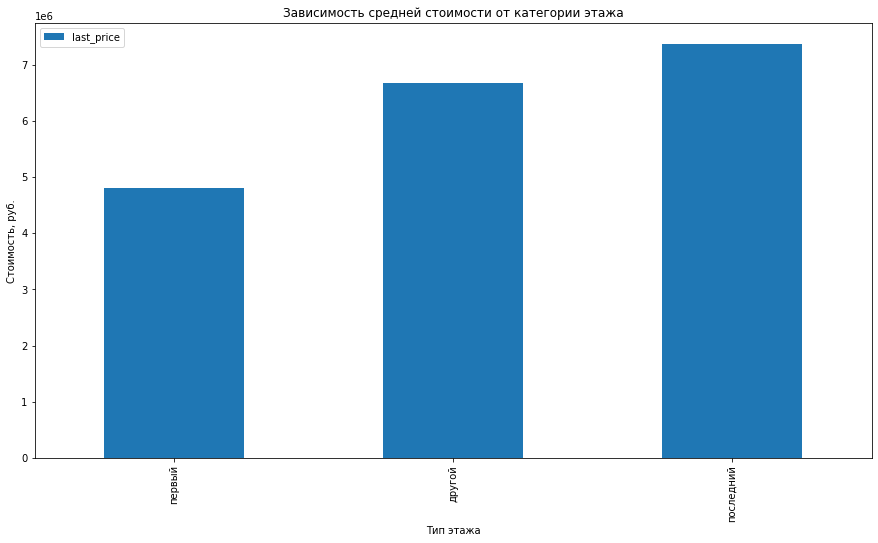

In [96]:
# Построим график зависимости цены объекта от типа этажа объекта
(
    data
    .pivot_table(index='floor_type', values='last_price')
    .sort_values(by='last_price')
    .plot.bar(figsize=(15, 8))
)
plt.title('Зависимость средней стоимости от категории этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость, руб.');

Не нравятся народу квартиры на первом этаже, от того, видимо, и цену выставляют меньше, чем для квартир, которые распологаются на любом другом этаже. Но на последнем этаже, ожидаемо как минимум для меня, цены на порядок больше.

Эти выводы удалось сформировать за счет подсчета среднего значения стоимости объекта. Но, как мы знаем, в данных имеются нетипичные значения, поэтому для наглядности и лучшего понимания ситуации построим барплот, вычислив медианное значение стоимости.

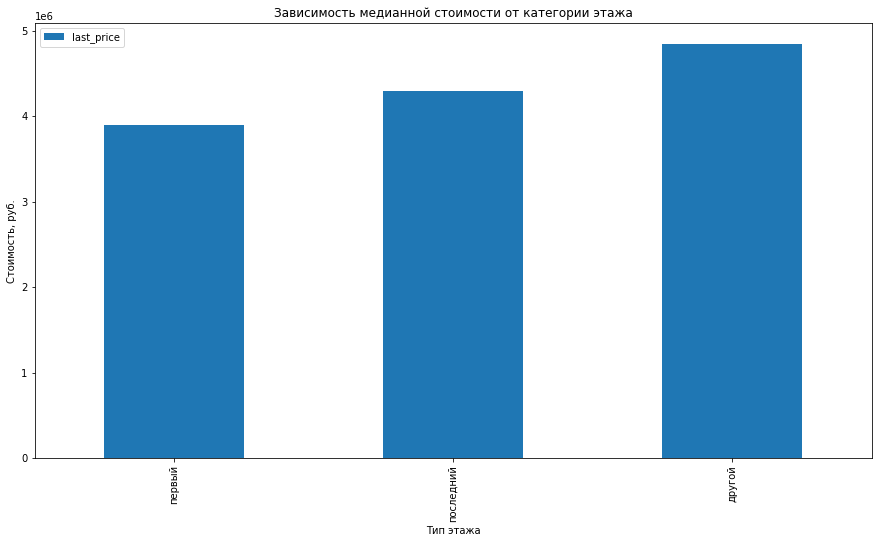

In [97]:
(
    data
    .pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .sort_values(by='last_price')
    .plot.bar(figsize=(15, 8))
)
plt.title('Зависимость медианной стоимости от категории этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость, руб.');

Теперь ситуация изменилась. Понизив влияние выбросов, наиболее дорогими квартирами оказались те, которые расположены между первым и последним этажами. Самыми дешевыми являются квартиры на первом этаже (эта же тенденция наблюдается при средней стоимости).

**Зависимость цены (`total_price`) от дня недели размещения объявления (`weekday_exposition`), месяца (`month_exposition`) и года (`year_exposition`)**

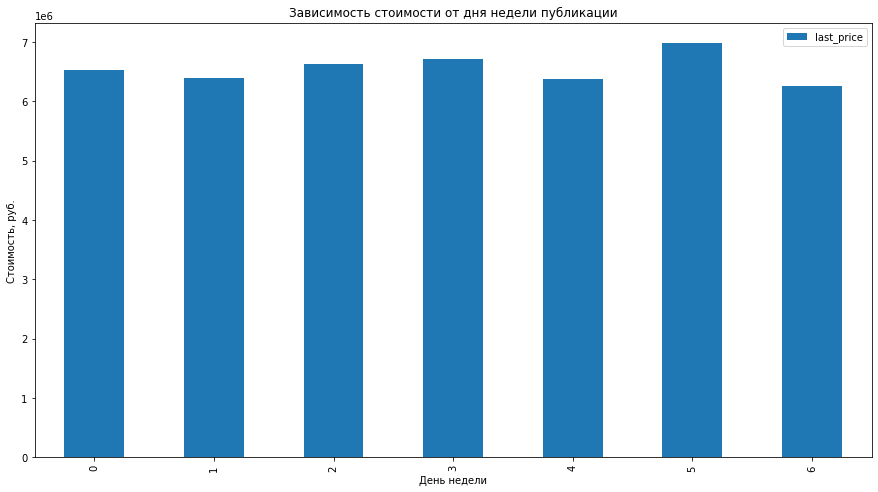

In [98]:
# Построим график зависимости цены объекта от дня недели публикации объявления
(
    data
    .pivot_table(index='weekday_exposition', values='last_price')
    .plot.bar(figsize=(15, 8))
)
plt.title('Зависимость стоимости от дня недели публикации')
plt.xlabel('День недели')
plt.ylabel('Стоимость, руб.');

По субботам пользователи предпочитают выставить максимальую цену, но уже в воскресенье решают снизить до минимума.

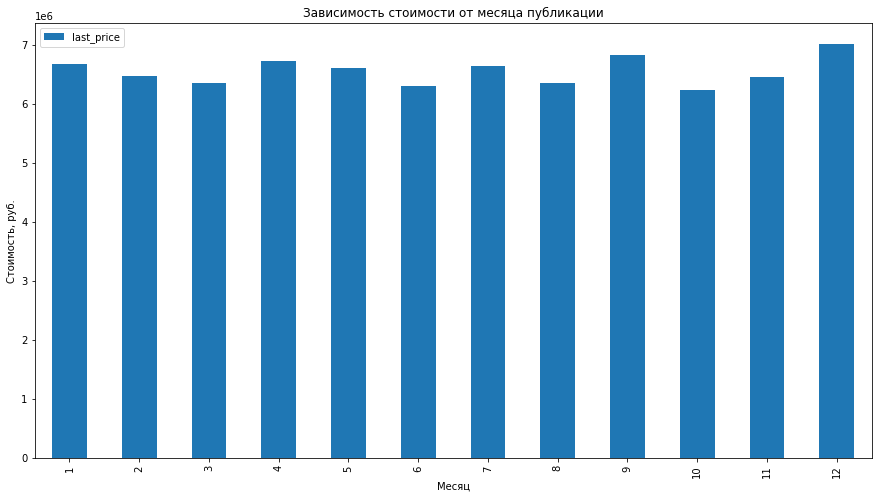

In [99]:
# Построим график зависимости цены объекта от месяца публикации объявления
(
    data
    .pivot_table(index='month_exposition', values='last_price')
    .plot.bar(figsize=(15, 8))
)
plt.title('Зависимость стоимости от месяца публикации')
plt.xlabel('Месяц')
plt.ylabel('Стоимость, руб.');

В декабре продаются самые дорогие квартиры. В период с декабря по март наблюдается постепенное снижение цены, другой подобный период с апреля по июнь. Летом тенденция меняется каждый месяц, то рост цены, то падение. С ноября по декабрь идет подъем стоимости.

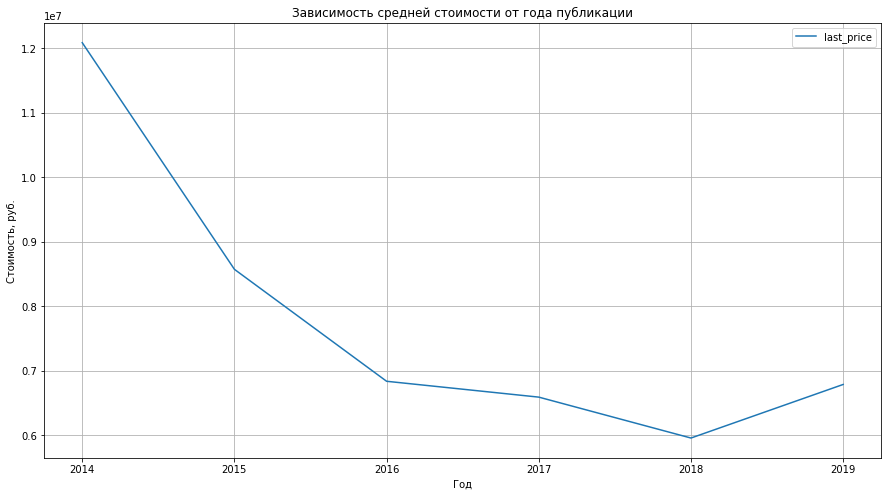

In [100]:
# Построим график зависимости средней цены объекта от года публикации объявления
(
    data
    .pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, figsize=(15, 8))
)
plt.title('Зависимость средней стоимости от года публикации')
plt.xlabel('Год')
plt.ylabel('Стоимость, руб.');

Недвижимость дешевела с 2014 года вплоть до 2018, после начался умеренный рост цены на объекты.

Рассмотрим график с медианной стоимостью:

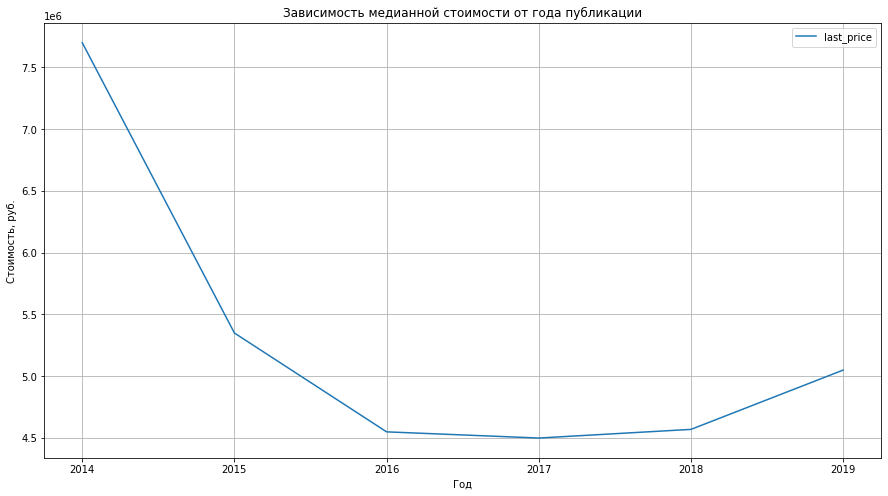

In [101]:
(
    data
    .pivot_table(index='year_exposition', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(15, 8))
)
plt.title('Зависимость медианной стоимости от года публикации')
plt.xlabel('Год')
plt.ylabel('Стоимость, руб.');

При рассмотрении медианной цены видим, что с 2016 по 2018 год цены менялись незначительно, однако, рост стоимости начался в 2017 году.

**Промежуточный вывод**

Для каждой пары параметров построили график зависимости. Зависимости были проанализированы, в ячейках `Markdown` под каждым графиком написаны краткие размышления.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [102]:
# Выведем на экран 10 населенных пунктов с наибольшим числом объявлений
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15700
поселок Мурино         556
поселок Шушары         440
Всеволожск             397
Пушкин                 366
Колпино                337
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 235
Name: locality_name, dtype: int64

С помощью метода `pivot_table()` сгруппируем таблицы следующим образом:
- индексом будут наименования населенных пунктов `locality_name`
- значениями станут столбец с ценой за 1 кв.м. `one_square_meter_cost` и цена объекта `last_price`

К значениям применим аггрегирующие функции:
- для `one_square_meter_cost` применим функцию поиска среднего значения
- для `last_price` применим функцию подсчета вхождений (для того, чтобы определить топ-10 населенных пунктов)

После применим сортировку по убыванию количества вхождений `last_price` и выведим первые 10 строк получившейся таблицы.

In [103]:
(
    data
    .pivot_table(index='locality_name',
                 values=['one_square_meter_cost', 'last_price'],
                 aggfunc={'one_square_meter_cost':'mean', 'last_price':'count'})
    .sort_values(by='last_price', ascending=False)
    .head(10)
)

,last_price,one_square_meter_cost
locality_name,,
Санкт-Петербург,15700,114839.724880
поселок Мурино,556,85681.762601
поселок Шушары,440,78677.364217
Всеволожск,397,68719.320400
Пушкин,366,103147.825496
Колпино,337,75443.972838
поселок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


Отобразим населенный пункт с самой высокой стоимостью за 1 квадратный метр

In [104]:
# В переменную `most_counts_locality` передадим сводную таблицу из пунтка выше
most_counts_locality = (
    data
    .pivot_table(index='locality_name',
                 values=['one_square_meter_cost', 'last_price'],
                 aggfunc={'one_square_meter_cost':'mean', 'last_price':'count'})
    .sort_values(by='last_price', ascending=False)
    .head(10)
)
# Отсортируем значения по убыванию по столбцу `one_square_meter_cost` и выведем первую запись
most_counts_locality.sort_values(by='one_square_meter_cost', ascending=False)[:1]

,last_price,one_square_meter_cost
locality_name,,
Санкт-Петербург,15700,114839.72488


Отобразим населнный пункт с самой низкой стоимостью за 1 квадратный метр

In [105]:
# Отсортируем значения по возрастанию по столбцу `one_square_meter_cost` и выведем первую запись
most_counts_locality.sort_values(by='one_square_meter_cost')[:1]

,last_price,one_square_meter_cost
locality_name,,
Выборг,235,58238.143141


##### Промежуточный вывод

Удалось отобразить на экране среднюю стоимость одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений, а также нашли н.п. с самой высокой и низкой стоимостями одного квадратного метра.

### Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра до центра города.

In [106]:
# В переменную `spb_data` передадим ту часть таблицы `data`, в которой населенным пунктом `locality_name` является Санкт-Петербург  
spb_data = data.loc[data['locality_name'] == 'Санкт-Петербург'].copy()
spb_data.shape

(15700, 29)

Сводную таблицу подготовили, расстояние до центра округлили. Теперь строим график зависимости цены объекта относительно каждого километра в сторону отдаления от центра города.

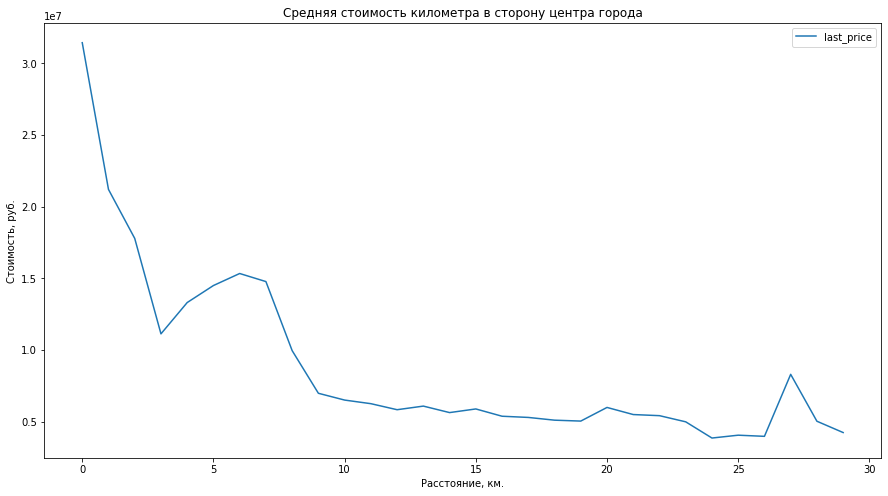

In [107]:
(
    spb_data
    .pivot_table(index='km_to_center', values='last_price')
    .plot(figsize=(15, 8))
)
plt.title('Средняя стоимость километра в сторону центра города')
plt.xlabel('Расстояние, км.')
plt.ylabel('Стоимость, руб.');

В качестве ответа на поставленную задачу отобразим на экране средную цену каждого километра до центра города

In [108]:
spb_data.pivot_table(index='km_to_center', values='last_price')

,last_price
km_to_center,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.112658e+07
4.0,1.331127e+07
5.0,1.449912e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.955567e+06


**Промежуточный вывод**

Разумеется, в центре города объекты имеют наивысшую стоимость. Она уменьшается при отдалении от центра города, но на расстоянии ~6 км. наблюдается подъем цены, после она продолжает снижаться. И лишь на расстоянии 27 км. от центра цена вновь показывает небольшой подъем.

### Общий вывод

В данном проекте провели исследовательский анализ данных.

Было выполнено следующее:
- удалось избавиться от пропущенных значений там, где обнаружилась логичная замена;
- в столбцах `is_apartment`, `balcony` и `first_day_exposition` изменили тип данных;
- избавились от неявных дубликатов в столбце `locality_name`;
- обработаны аномалии в данных;
- добавлены новые столбцы:
    - цена одного квадратного метра (`one_square_meter_cost`);
    - номер дня недели публикации объявления (`weekday_exposition`);
    - номер месяца публикации объявления (`month_exposition`);
    - год публикации объявления (`year_exposition`);
    - тип этажа объекта (`floor_type`);
    - расстояние до центра города в км. (`km_to_center`).
- изучены параметры объектов:
    - общая площадь объекта (`total_area`);
    - жилая площадь объекта (`living_area`);
    - площадь кухни (`kitchen_area`);
    - цена объекта (`last_price`);
    - количество комнат (`rooms`);
    - высота от пола до потолка (`ceiling_height`);
    - этаж объекта (`floor`);
    - тип этажа объекта (`floor_type`);
    - общее количество этажей в доме (`floors_total`);
    - расстояние до центра города в метрах (`cityCenters_nearest`);
    - расстояние до ближайшего аэропорта (`airport_nearest`);
    - расстояние до ближайшего парка (`parks_nearest`);
    - день и месяц публикации объявления (`weekday_exposition`, `month_exposition`).
- изучена зависимость быстроты продажи квартиры;
- изучена зависимость цены объекта от:
    - общей площади объекта (`total_area`);
    - жилой площади объекта (`living_area`);
    - площади кухни (`kitchen_area`);
    - количества комнат (`rooms`);
    - типа этажа объекта (`floor_type`);
    - дня недели (`weekday_exposition`) и месяца (`month_exposition`) размещения объявления.
- посчитали среднюю цену за 1 квадратный метр в 10 населенных пунктах с наибольшим количеством объявлений;
- определили среднюю стоимость каждого километра от центра Санкт-Петербурга.

По итогам выполненных мероприятий было обнаружено, что стоимость объекта, в целом, зависит от площадей (`total_area`, `living_area`, `kitchen_area`), от количества комнат, типа этажа. Всё поддается простой логике: больше площадь квартиры - больше стоимость. Но для квартир с одинаковой площадью может быть разная цена. В первую очередь, стоит смотреть на состояние квартиры, качество ремонта, наличие мебели, а уже потом искать зависимость от других параметров. Зависимость от дня недели и месяца вызывает некие подозрения.

Также, стоимость в центре города (на примере Санкт-Петербурга) стоит дороже, чем квартиры, отдаленные на несколько километров от центра города. Тут тоже все предельно логично. Людям приходится платить за удобства, которые предоставляет городская среда (в частности центр города), а еще это попросту престижнее.

Тип этажа играет свою роль. В зависимости от того, какую стоимость брать (среднюю или медианную), разнится результат исследования зависимости стоимости квартиры от категории этажа. При рассмотрении средней стоимости наиболее ценными являются квартиры на последнем этаже. Если же мы посмотрим на медианную стоимость, то самые дорогие квартиры на "других" этажах (любой этаж, кроме первого и последнего). Оба варианта показывают, что на первом этаже квартиры дешевле остальных.

Итог: стоимость квартиры зависит от очень большого количества параметров. Их можно разбить на первостепенные (площадь, отдаленность от центра, состояние квартиры, этаж, количество комнат) и на второстепенные (день, месяц публикации объявления). Каждый из параметров действительно влияет на цену объекта, к примеру, площадь влияет больше, а этаж меньше, но эти зависимости нельзя исключать, каждый в какой-то мере важен. Для того, чтобы выявить недобросовестных пользователей необходимо учитывать все коррелирующие со стоимостью объекта признаки. После чего сравнивать стоимость со средними (медианными) показателями. Сильное отличие в стоимости от средних (медианных) показателей - повод для подозрений.